# Introduction

### In this project, we will develop and evaluate the performance and predictive power of a model trained and tested on data collected from houses located in Boston

#### Once we get a stabel model we will use it to predict the monetary value of house located in Boston

#### The datset used has in total 14 columns with historical datas collected from different areas in Boston that we will divide into 13 features and 1 target column

***The Columns are Given as:***
- CRIM: This is the per capita crime rate by town
- ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
- INDUS: This is the proportion of non-retail business acres per town.
- CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
- NOX: This is the nitric oxides concentration (parts per 10 million)
- RM: This is the average number of rooms per dwelling
- AGE: This is the proportion of owner-occupied units built prior to 1940
- DIS: This is the weighted distances to five Boston employment centers
- RAD: This is the index of accessibility to radial highways
- TAX: This is the full-value property-tax rate per  \$10,000
- PTRATIO: This is the pupil-teacher ratio by town
- B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: This is the percentage lower status of the population
- MEDV: This is the median value of owner-occupied homes in $1000s

In [75]:
#importing libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, adjusted_rand_score
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
import pickle
import pylab
%matplotlib inline

## Data Collection

In [2]:
#loading data and making a dataframe
boston = load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [3]:
#joining to make a new dataframe
bos = features
bos['price'] = targets 

In [4]:
#top 5 data
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
#shape of data
bos.shape

(506, 14)

In [6]:
#checking for datatypes and any null values
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#statistics of the data
bos.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### NO Null Values

## EDA

C:\Users\ARKAJIT\Anaconda3\envs\practice\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


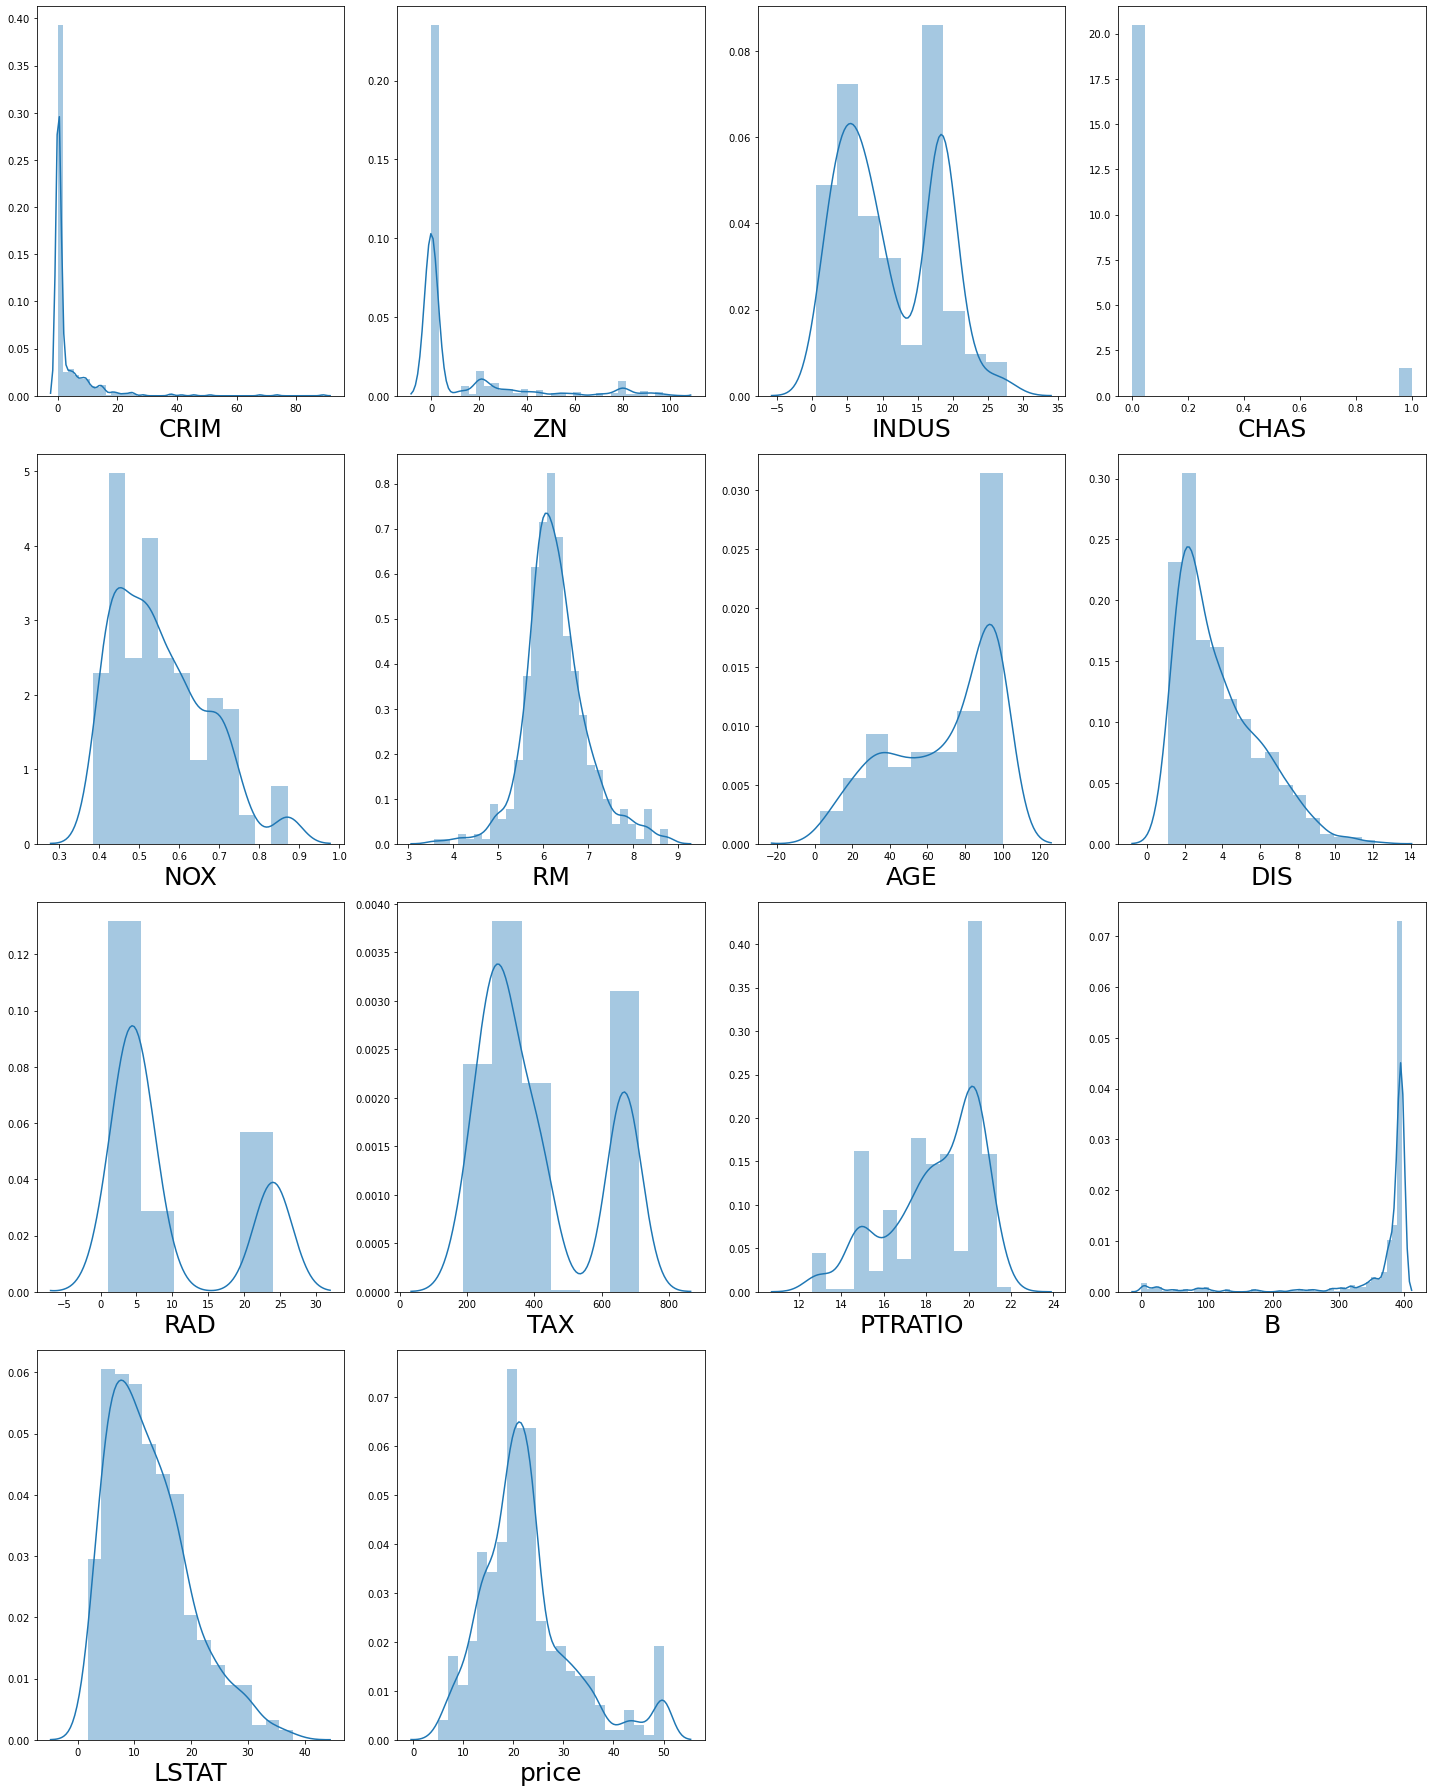

In [8]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in bos.columns:
    if pltnumber<=16:
        ax=plt.subplot(4, 4, pltnumber)
        sns.distplot(bos[column], ax=ax)
        plt.xlabel(column, fontsize=25)
    pltnumber+=1
plt.tight_layout()

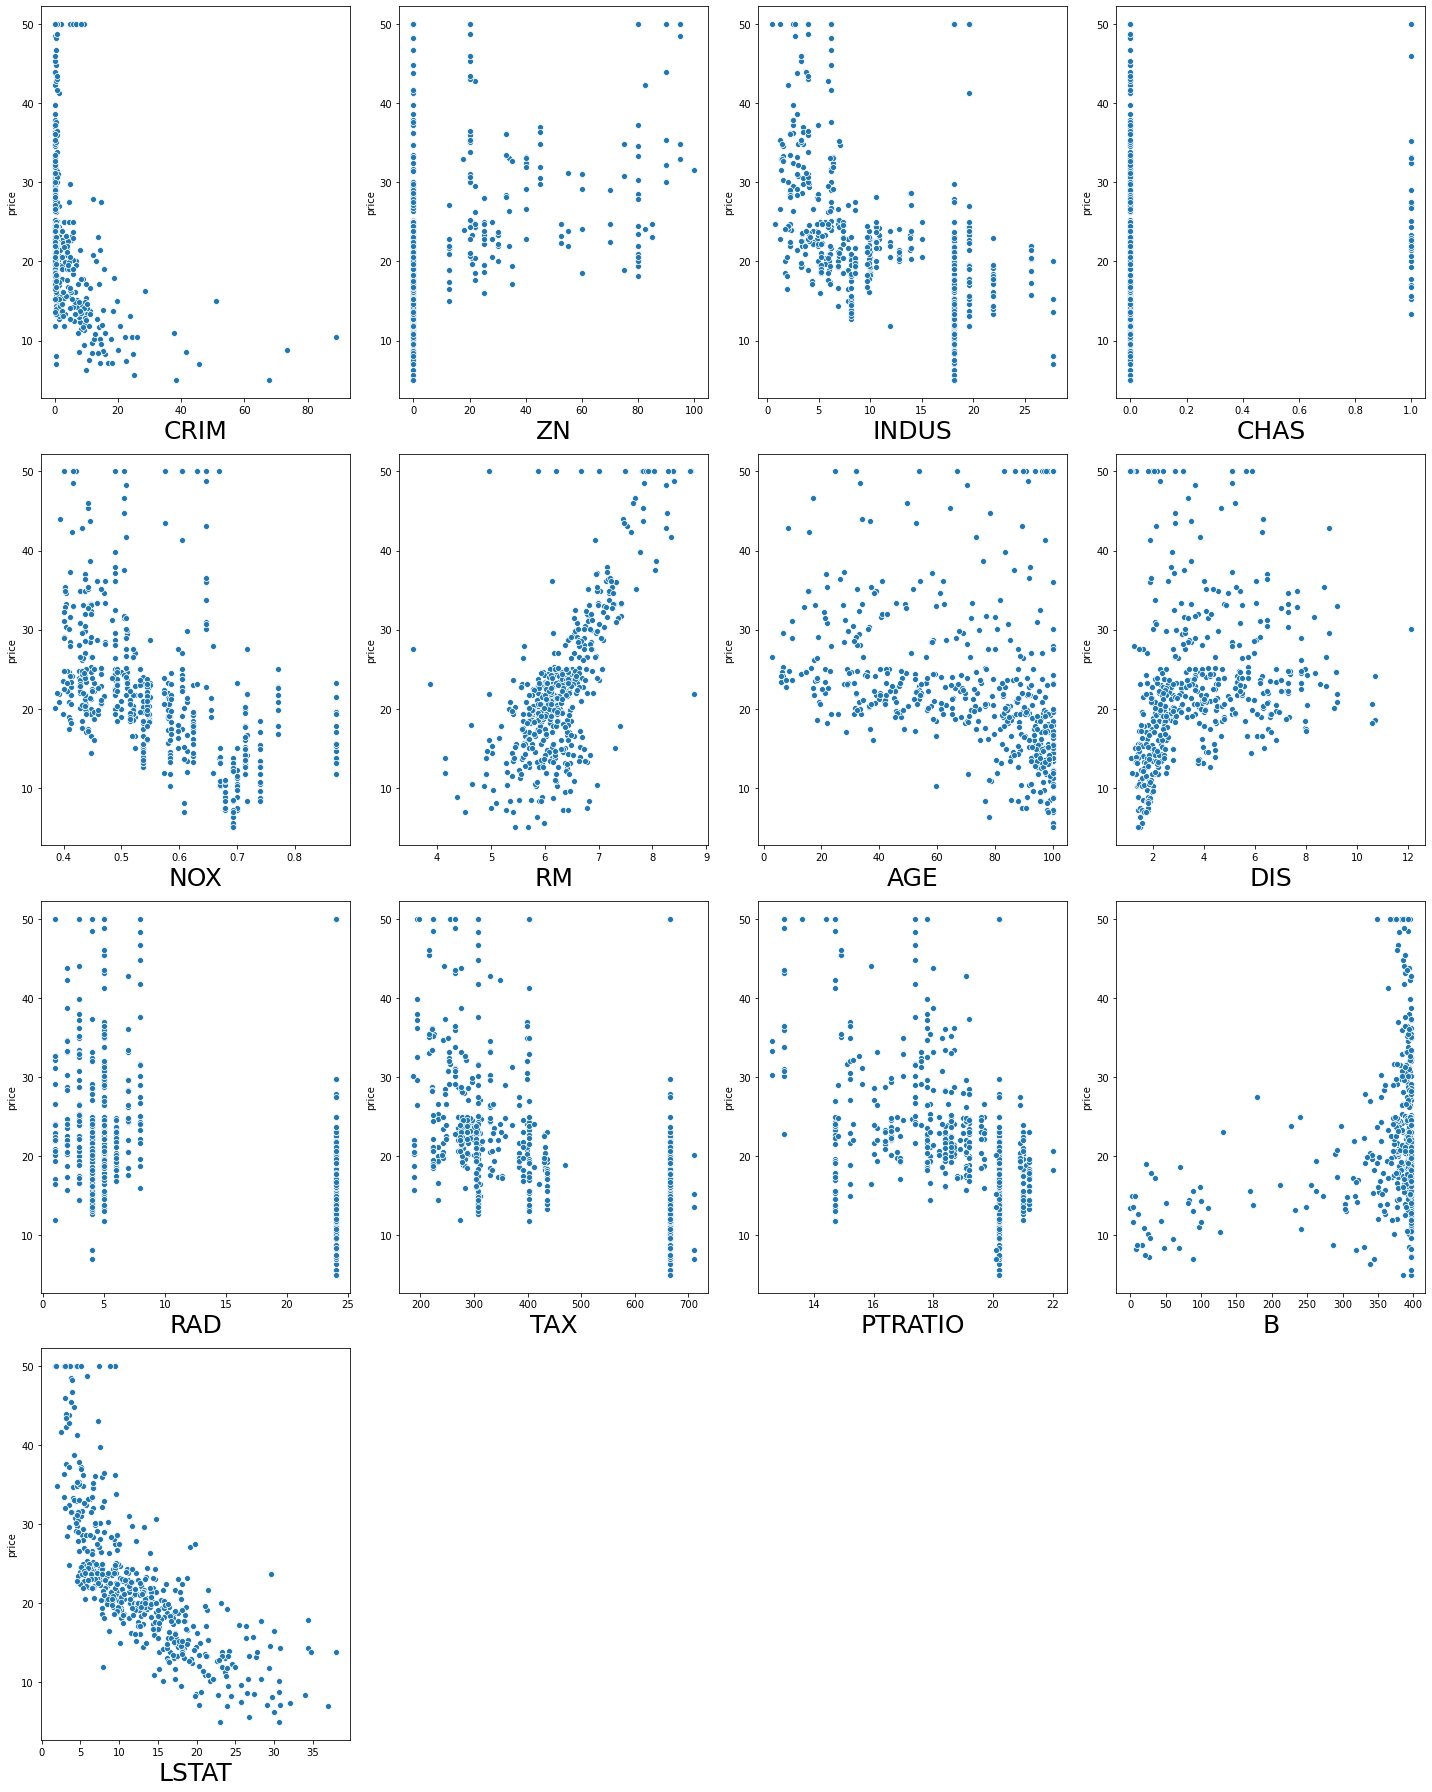

In [9]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in bos.drop(['price'], axis=1).columns:
    if pltnumber<=16:
        ax=plt.subplot(4, 4, pltnumber)
        sns.scatterplot(x=bos[column],y=bos['price'], ax=ax)
        plt.xlabel(column, fontsize=25)
    pltnumber+=1
plt.tight_layout()

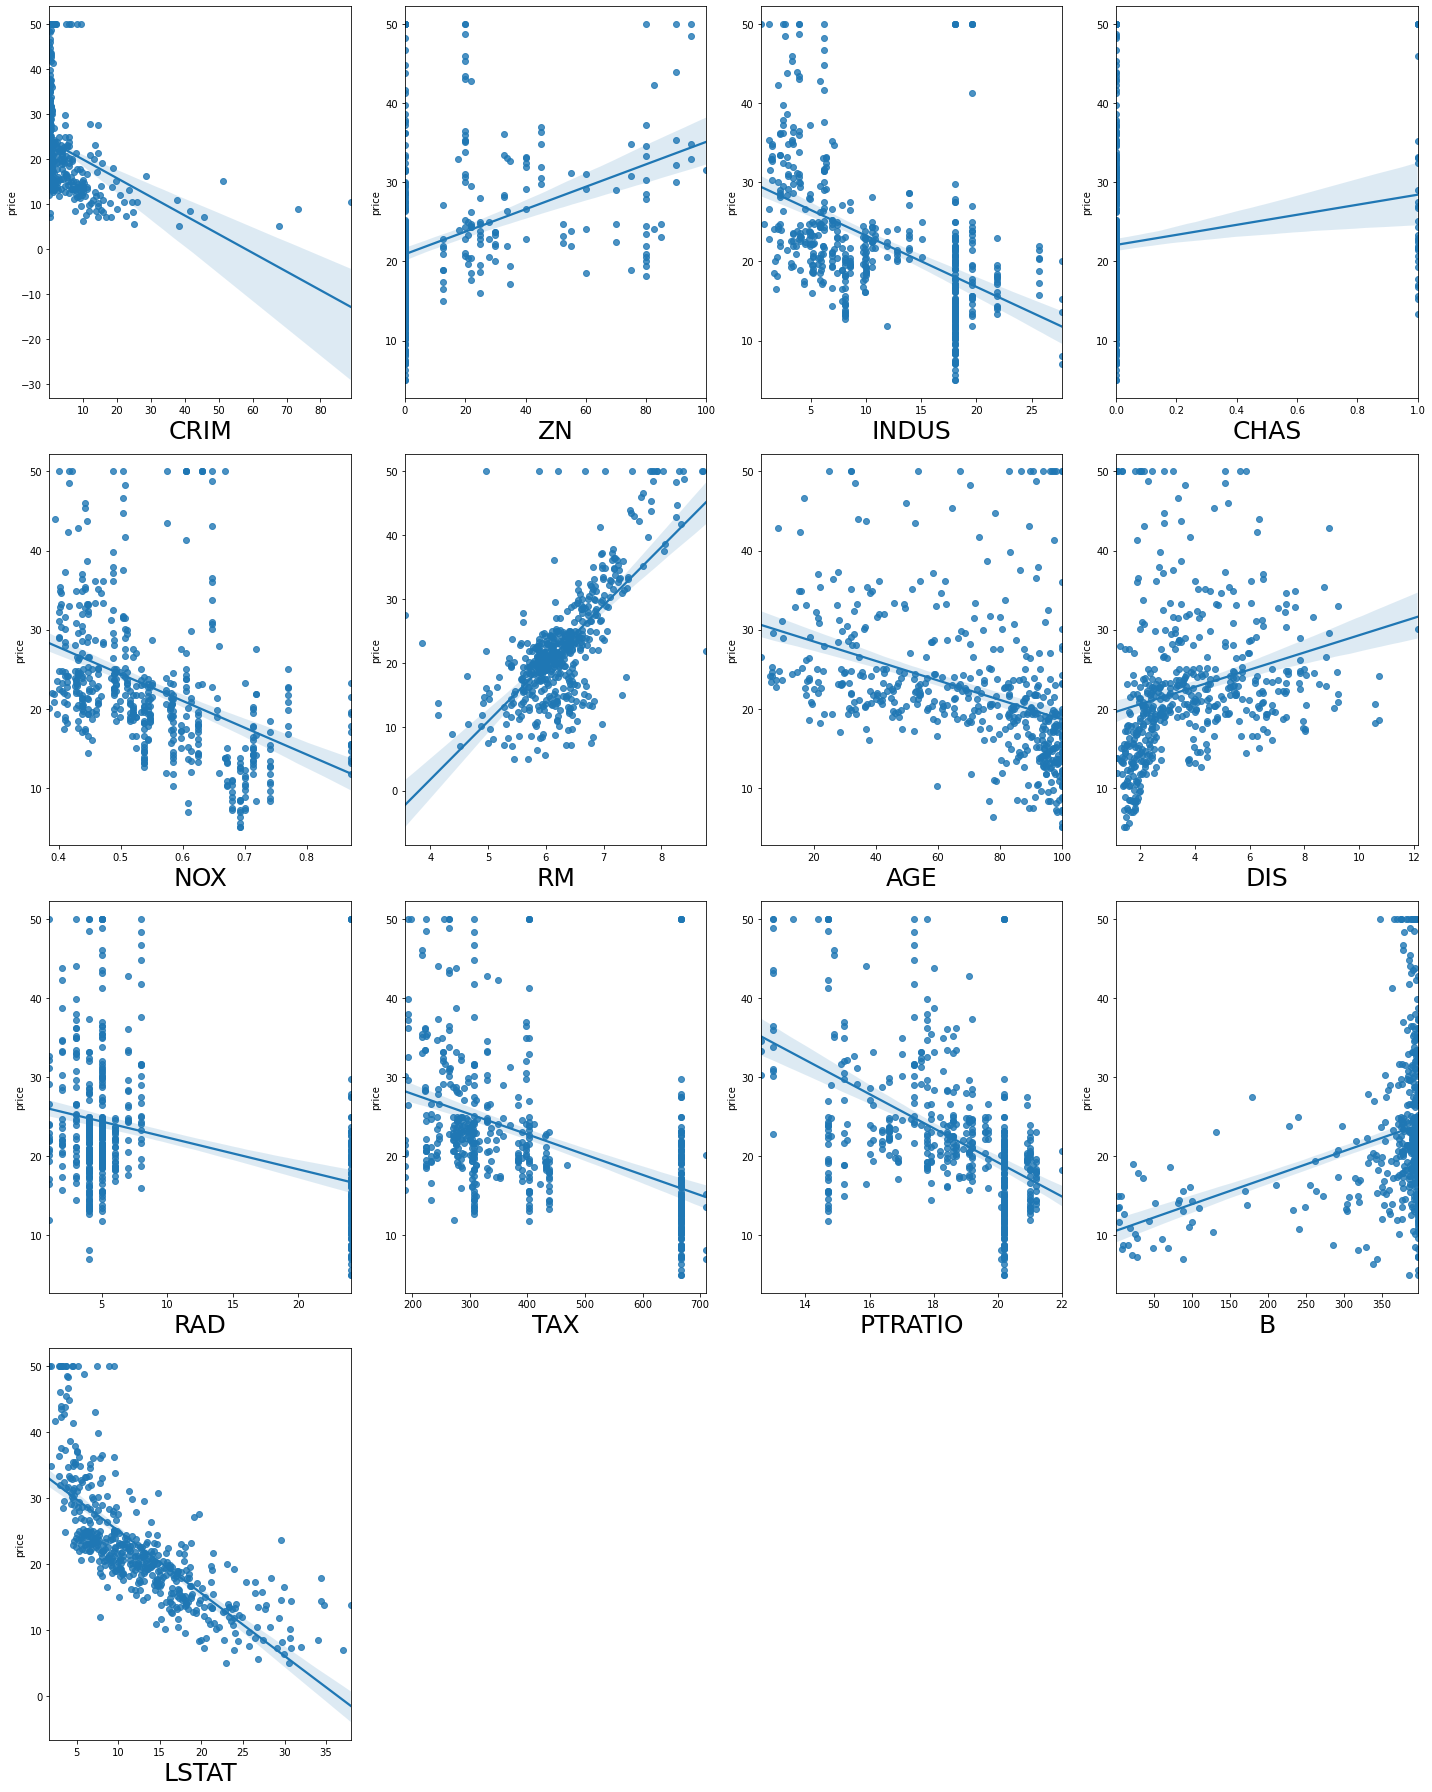

In [10]:
plt.figure(figsize=(20,25), facecolor='white')
pltnumber = 1

for column in bos.drop(['price'], axis=1).columns:
    if pltnumber<=16:
        ax=plt.subplot(4, 4, pltnumber)
        sns.regplot(x=bos[column],y=bos['price'], ax=ax)
        plt.xlabel(column, fontsize=25)
    pltnumber+=1
plt.tight_layout()

## Feature Engineering

### Checking for any outliers

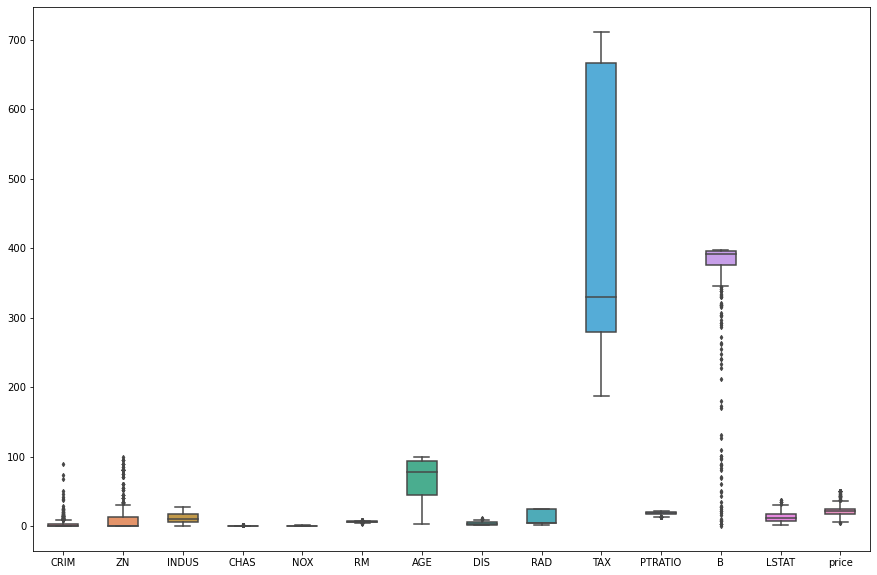

In [11]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)

### Removing the outliers

In [12]:
q = bos['CRIM'].quantile(0.98)
cleaned_data = bos[bos['CRIM']<q]
q = cleaned_data['ZN'].quantile(0.98)
cleaned_data = cleaned_data[cleaned_data['ZN']<q]
q = cleaned_data['DIS'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['DIS']<q]
q = cleaned_data['PTRATIO'].quantile(0.01)
cleaned_data = cleaned_data[cleaned_data['PTRATIO']>q]
q = cleaned_data['B'].quantile(0.05)
cleaned_data = cleaned_data[cleaned_data['B']>q]
q = cleaned_data['LSTAT'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['LSTAT']<q]
q = cleaned_data['price'].quantile(0.99)
cleaned_data = cleaned_data[cleaned_data['price']<q]

In [13]:
cleaned_data.shape

(423, 14)

In [14]:
#taking a backup of the main data
data_bckup = bos.copy()
bos = cleaned_data

## Checking Skewness in our Data

In [15]:
for column in bos.columns:
    print("{} = {}".format(column, bos[column].skew()))

CRIM = 2.6955618391706513
ZN = 2.336109883015382
INDUS = 0.4684256334776452
CHAS = 3.5021344426498873
NOX = 1.0069118576844474
RM = 0.2902031103878974
AGE = -0.5312387993338648
DIS = 0.7601923957205394
RAD = 1.2897248609741931
TAX = 0.8760568702602485
PTRATIO = -0.5986689323209095
B = -3.918880550894725
LSTAT = 0.7630975153462337
price = 0.9170501888630802


#### we can see that the skewness value of some features are not close to zero(0). So we will handle this with some transformation techniques

## Transformation Techniques

In [16]:
#probabity plot function
def plot_data(df, feature):
    plt.figure(figsize=(20,25), facecolor='white')
    plt.subplot(2,2,1)
    df[feature].hist()
    plt.subplot(2,2,2)
    stats.probplot(df[feature], dist='norm', plot=pylab)

2.6955618391706513
7.726257534198279


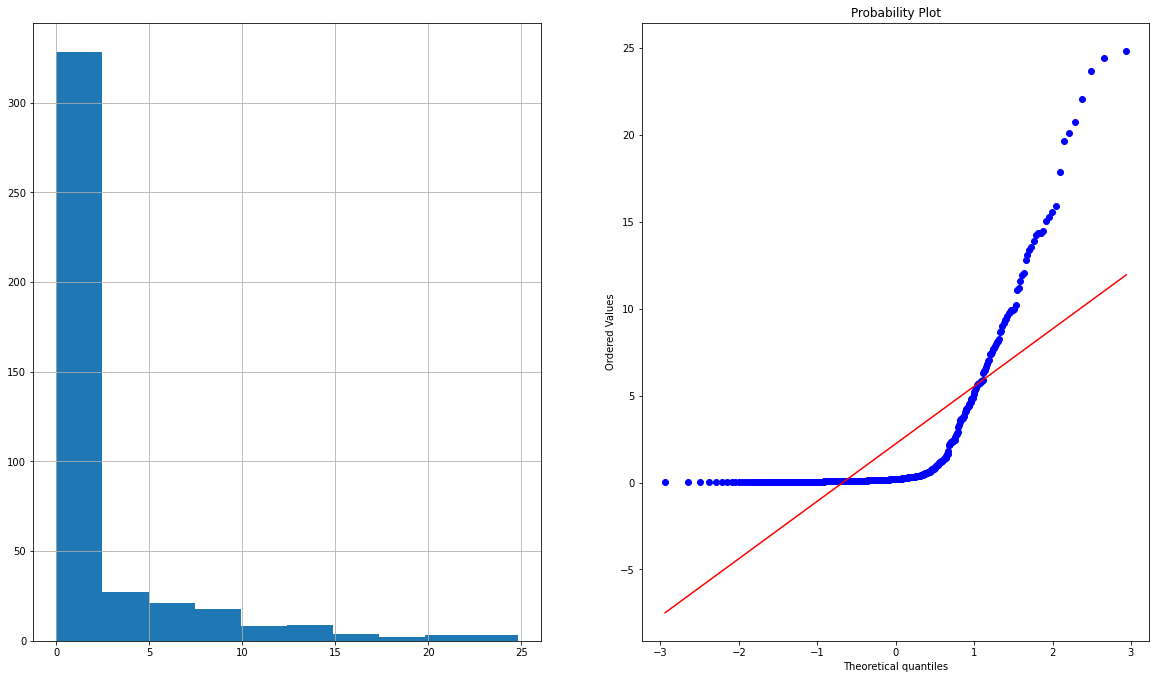

In [17]:
print(bos['CRIM'].skew())
print(bos['CRIM'].kurtosis())
plot_data(bos, 'CRIM')

0.5336445049099938
-0.8912390988586276


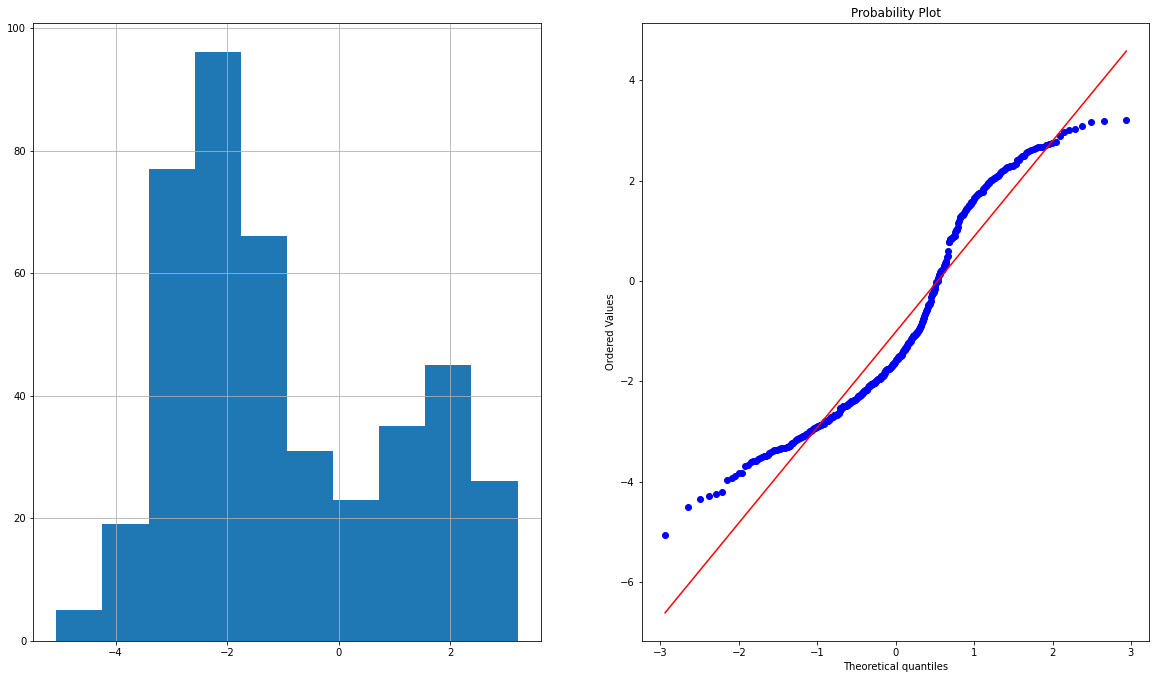

In [18]:
bos['CRIM_log'] = np.log(bos['CRIM'])
print(bos['CRIM_log'].skew())
print(bos['CRIM_log'].kurtosis())
plot_data(bos, 'CRIM_log')

1.6030388030313367
1.6597300289474495


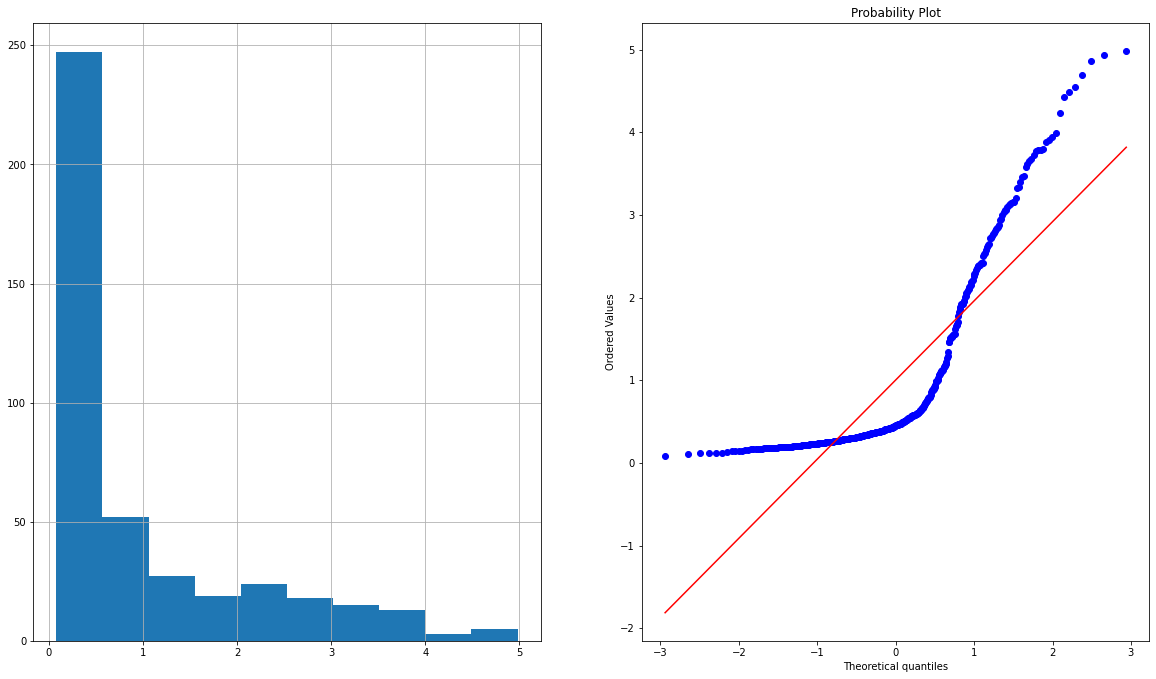

In [19]:
bos['CRIM_sqrt'] = np.sqrt(bos['CRIM'])
print(bos['CRIM_sqrt'].skew())
print(bos['CRIM_sqrt'].kurtosis())
plot_data(bos, 'CRIM_sqrt')

4.362233436458736
32.354147486103436


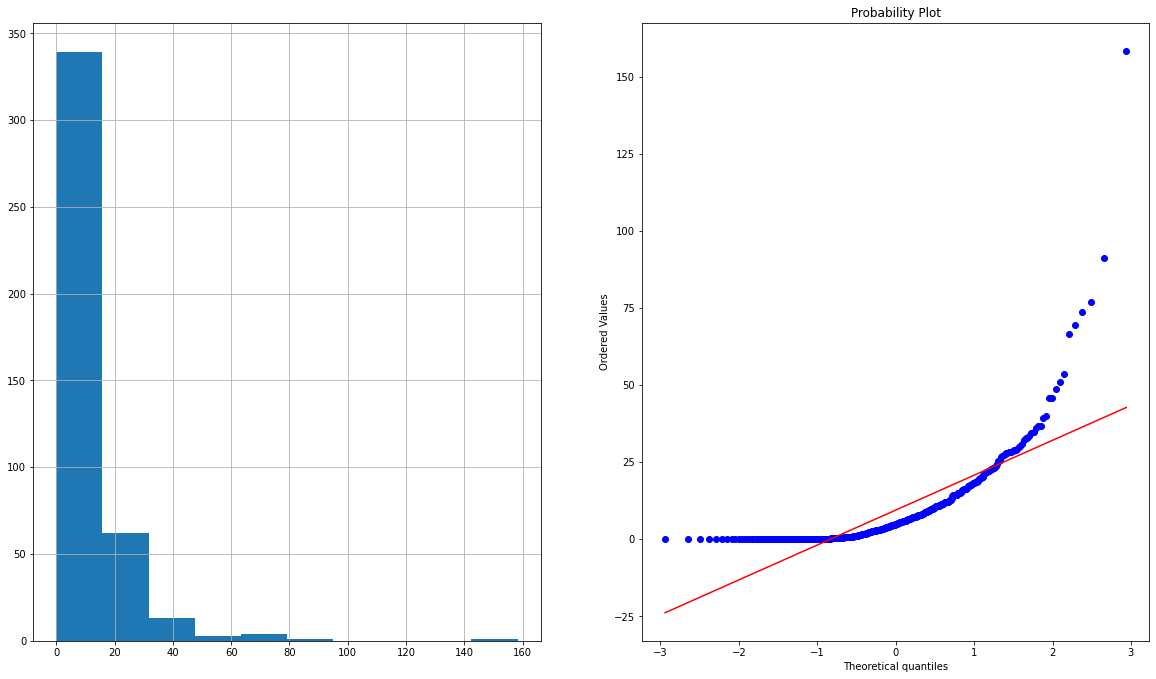

In [20]:
bos['CRIM_reciprocal'] = 1/(bos['CRIM'])
print(bos['CRIM_reciprocal'].skew())
print(bos['CRIM_reciprocal'].kurtosis())
plot_data(bos, 'CRIM_reciprocal')

-0.1312223853309711
-0.9340771544067445


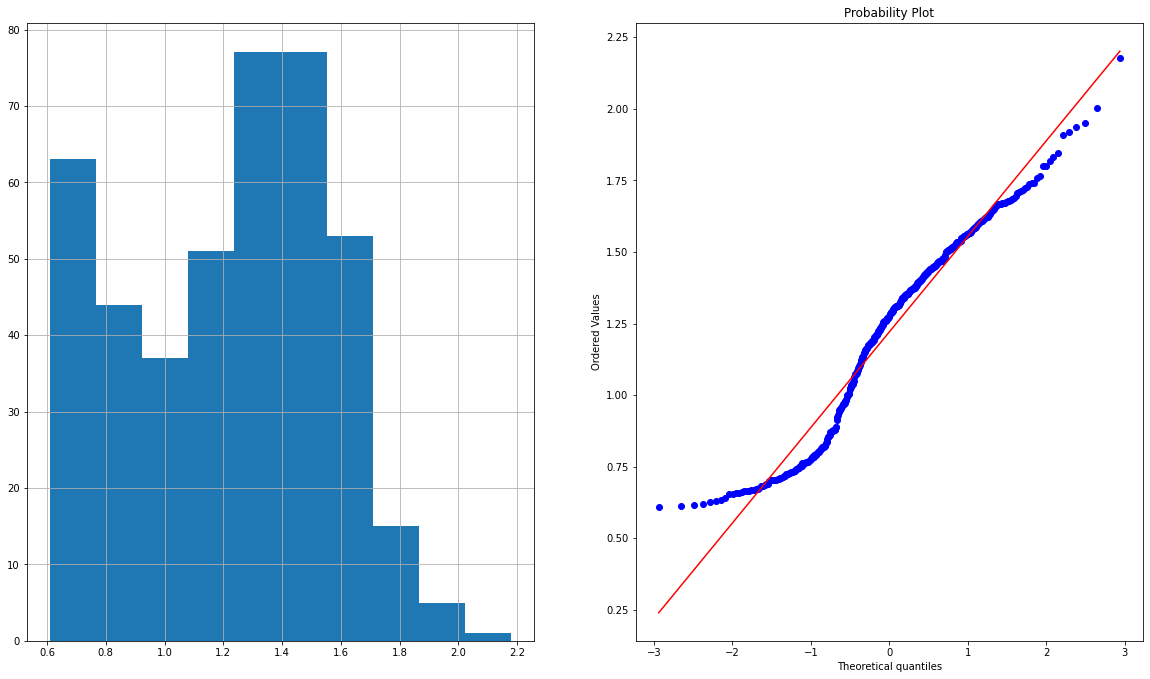

In [21]:
bos['CRIM_exponent'] = 1/(bos['CRIM']**(1/6.5))
print(bos['CRIM_exponent'].skew())
print(bos['CRIM_exponent'].kurtosis())
plot_data(bos, 'CRIM_exponent')

0.11243498759557667
-0.9241542708849373
parameter =  -0.1604547970760181


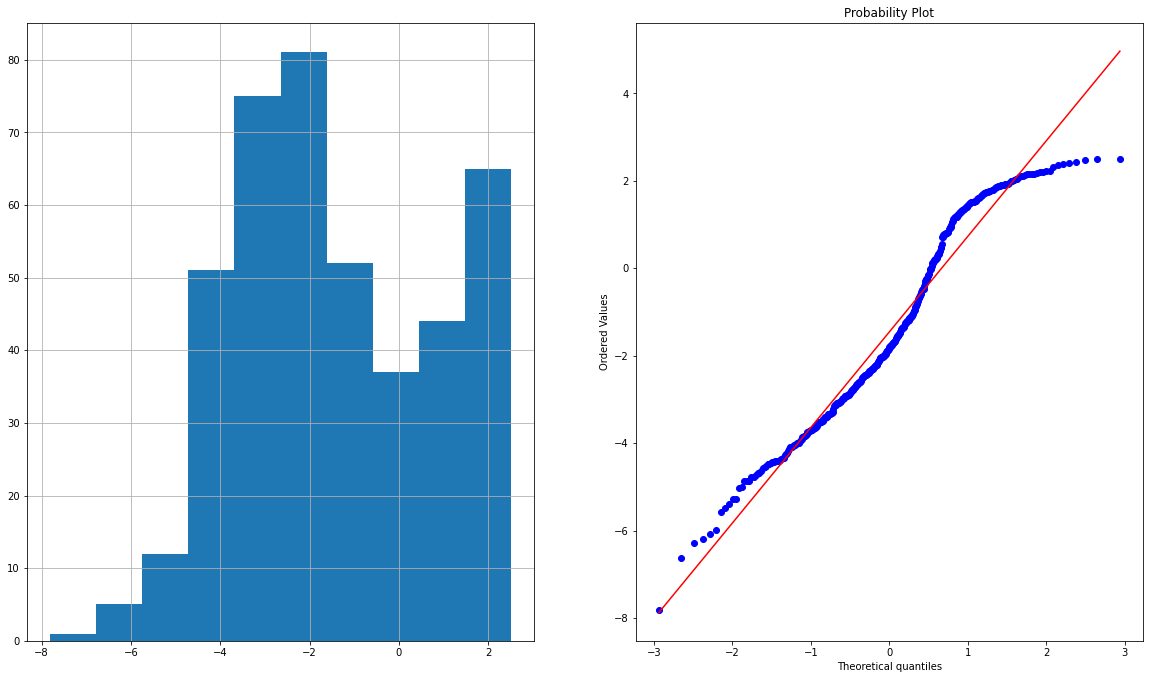

In [22]:
bos['CRIM_boxcox'], parameter = stats.boxcox(bos['CRIM'])
print(bos['CRIM_boxcox'].skew())
print(bos['CRIM_boxcox'].kurtosis())
print('parameter = ', parameter)
plot_data(bos, 'CRIM_boxcox')

In [23]:
# bos.drop(['CRIM_boxcox', 'CRIM_log', 'CRIM_reciprocal', 'CRIM', 'CRIM_sqrt'], axis=1, inplace=True)

2.336109883015382
4.842618210017654


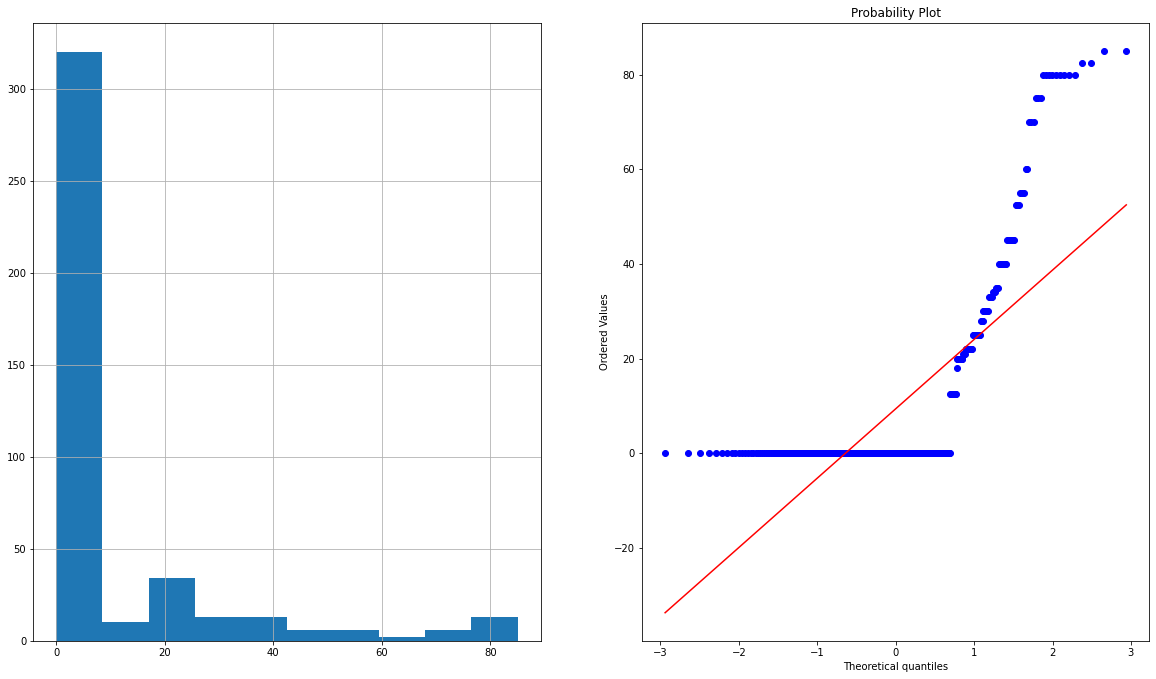

In [24]:
print(bos['ZN'].skew())
print(bos['ZN'].kurtosis())
plot_data(bos, 'ZN')

1.3067380499711787
-0.13102240602150061


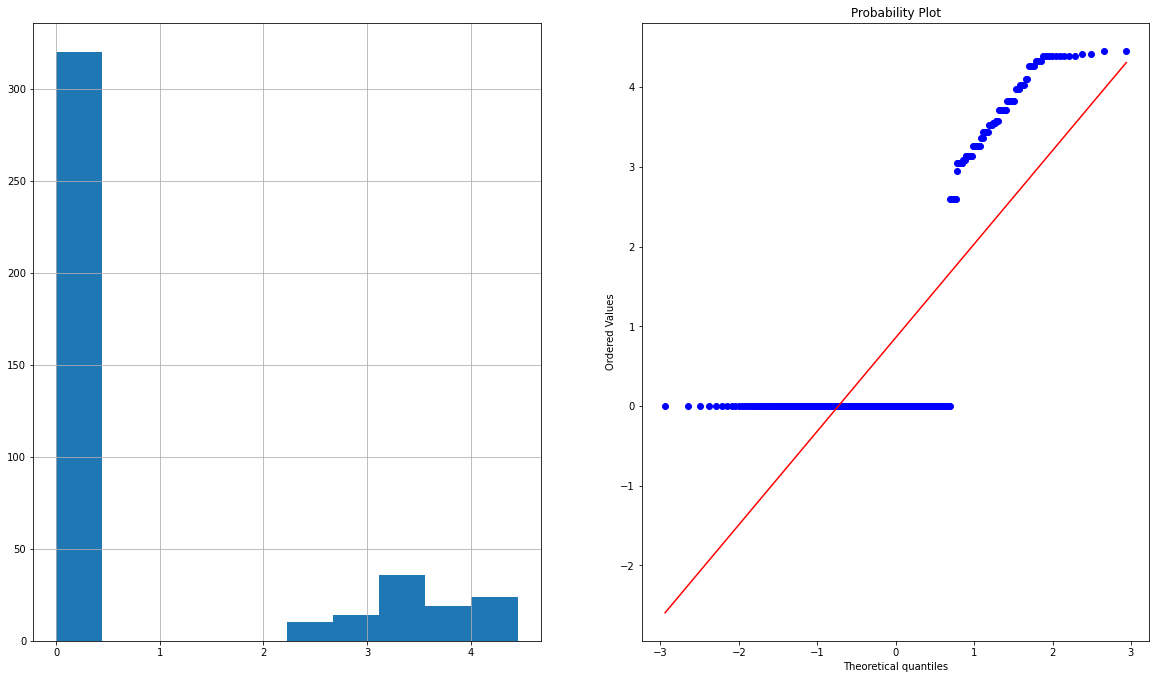

In [25]:
bos['ZN_log'] = np.log1p(bos['ZN'])
print(bos['ZN_log'].skew())
print(bos['ZN_log'].kurtosis())
plot_data(bos, 'ZN_log')

-1.2010714559954454
-0.557730080099224


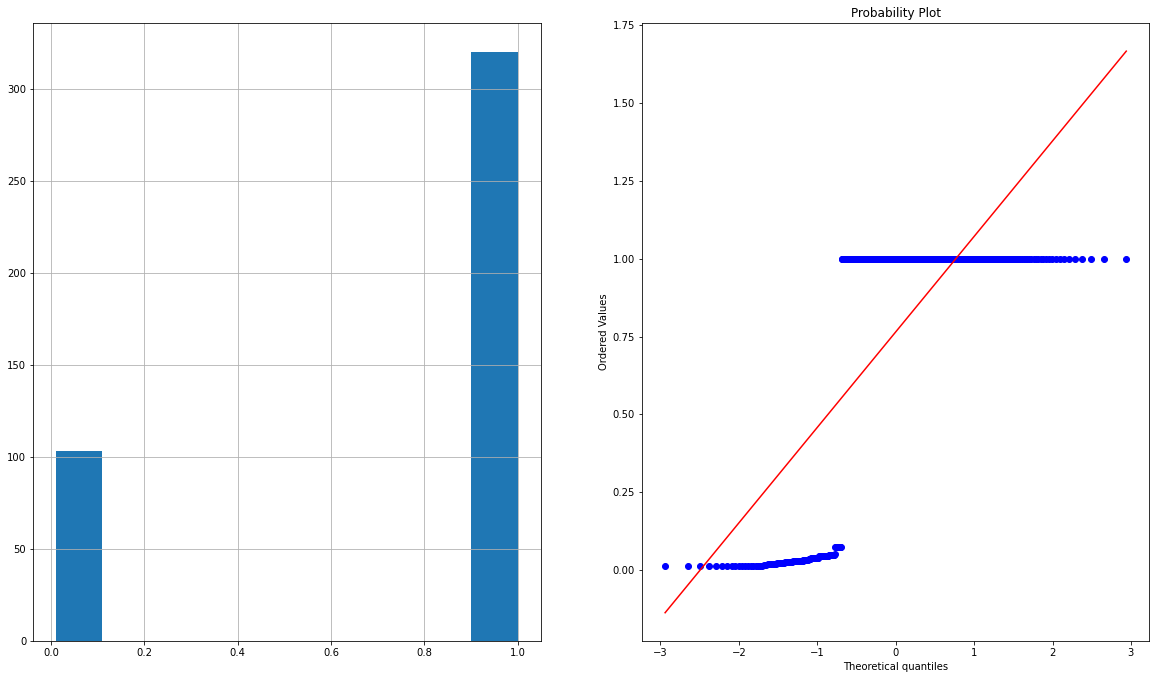

In [26]:
bos['ZN_reciprocal'] = 1/(bos['ZN']+1)
print(bos['ZN_reciprocal'].skew())
print(bos['ZN_reciprocal'].kurtosis())
plot_data(bos, 'ZN_reciprocal')

0.11630483669676255
4.12548134674686


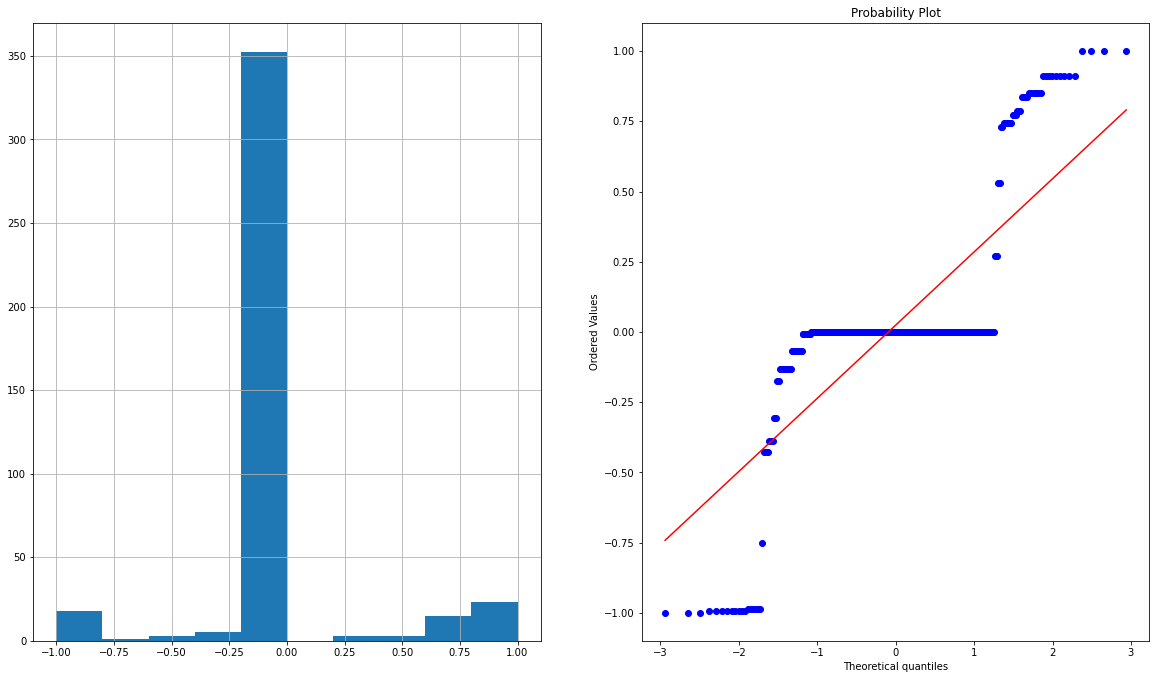

In [27]:
bos['ZN_trigo'] = np.sin(bos['ZN'])
print(bos['ZN_trigo'].skew())
print(bos['ZN_trigo'].kurtosis())
plot_data(bos, 'ZN_trigo')

1.6620971384669025
1.4400405553349875


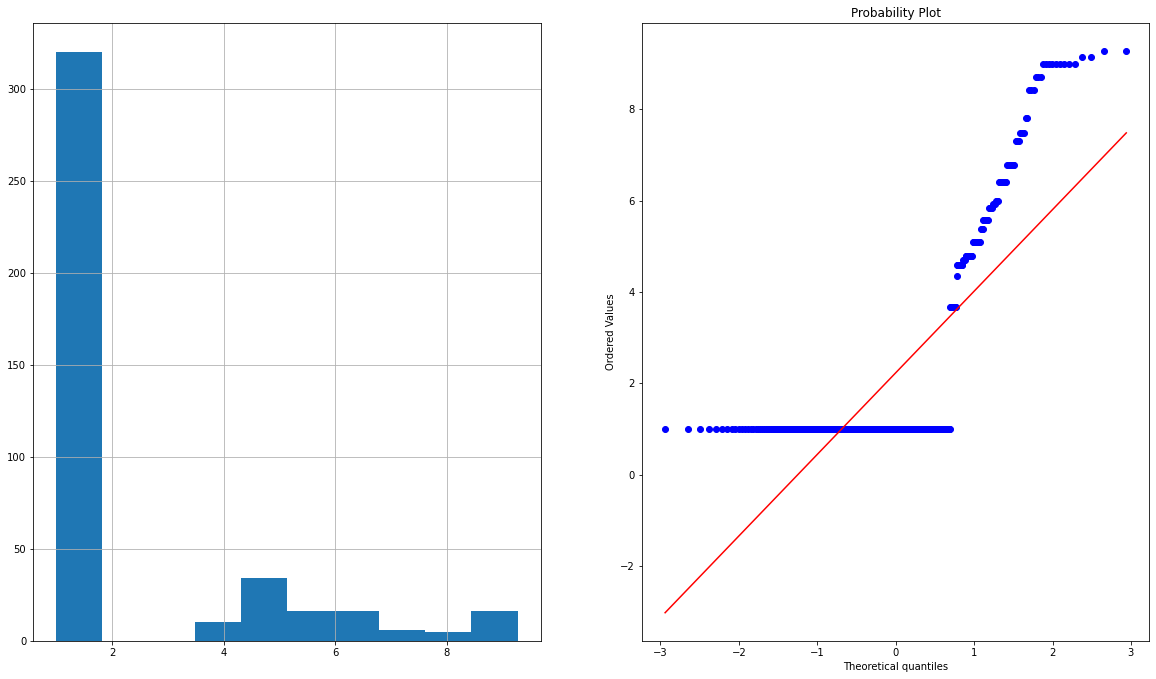

In [28]:
bos['ZN_sqrt'] = np.sqrt(bos['ZN']+1)
print(bos['ZN_sqrt'].skew())
print(bos['ZN_sqrt'].kurtosis())
plot_data(bos, 'ZN_sqrt')

1.2016319708185512
-0.5554411678863076


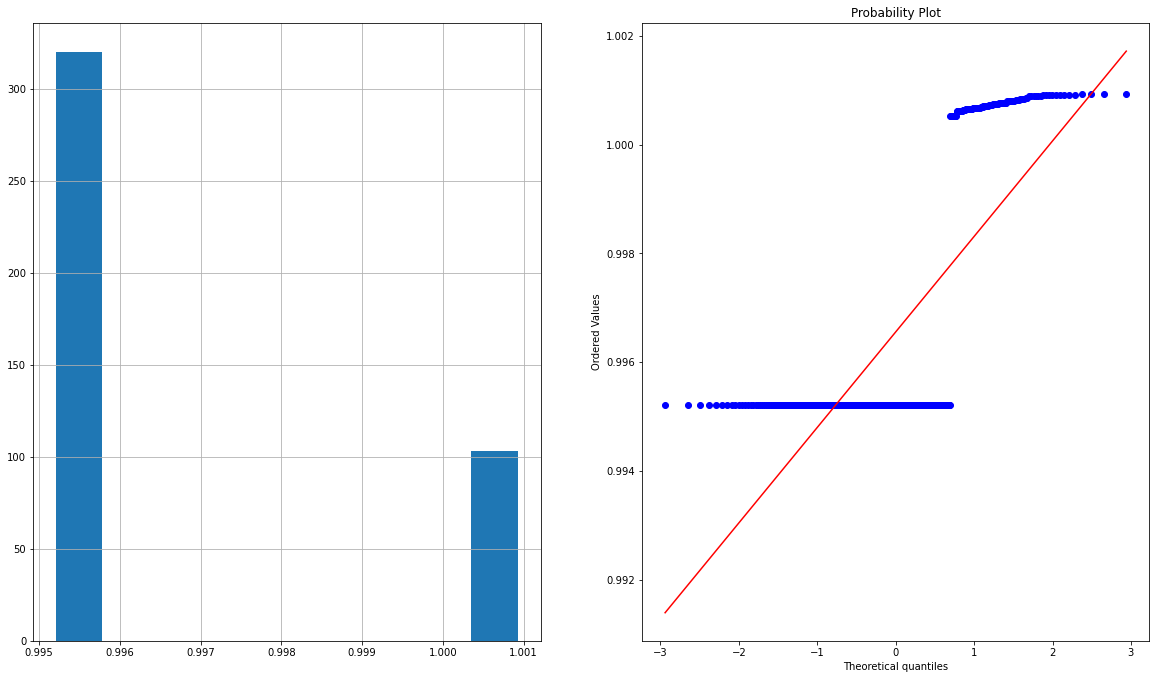

In [29]:
bos['ZN_exponential'] = (bos['ZN']+0.0000000001)**(1/4800)
print(bos['ZN_exponential'].skew())
print(bos['ZN_exponential'].kurtosis())
plot_data(bos, 'ZN_exponential')

1.200757576285403
-0.5589667705018009


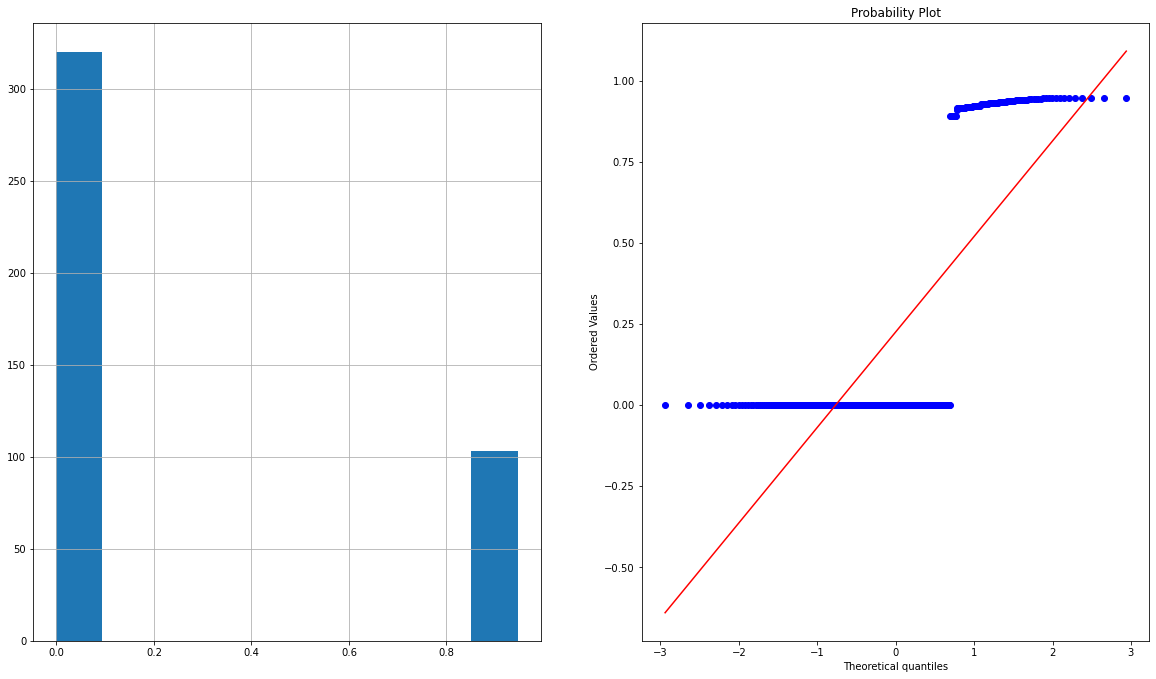

In [30]:
bos['ZN_boxcox'], parameter = stats.boxcox((bos['ZN']+1))
print(bos['ZN_boxcox'].skew())
print(bos['ZN_boxcox'].kurtosis())
plot_data(bos, 'ZN_boxcox')

0.7601923957205394


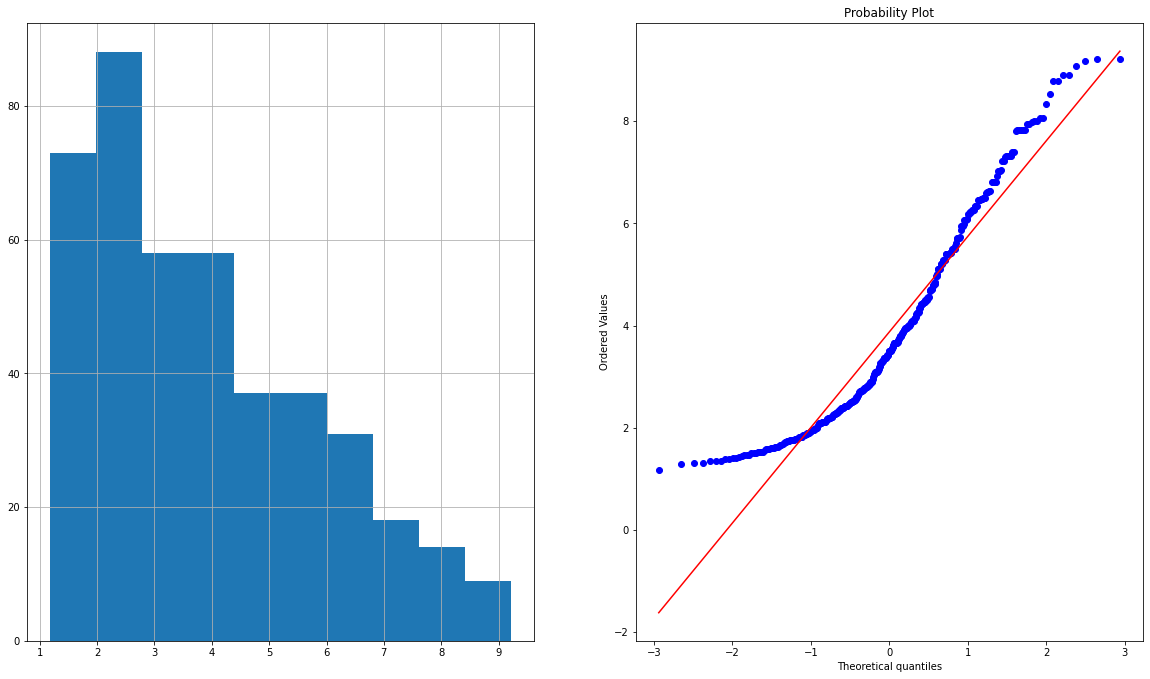

In [31]:
print(bos['DIS'].skew())
plot_data(bos, 'DIS')

0.0004435085963370542


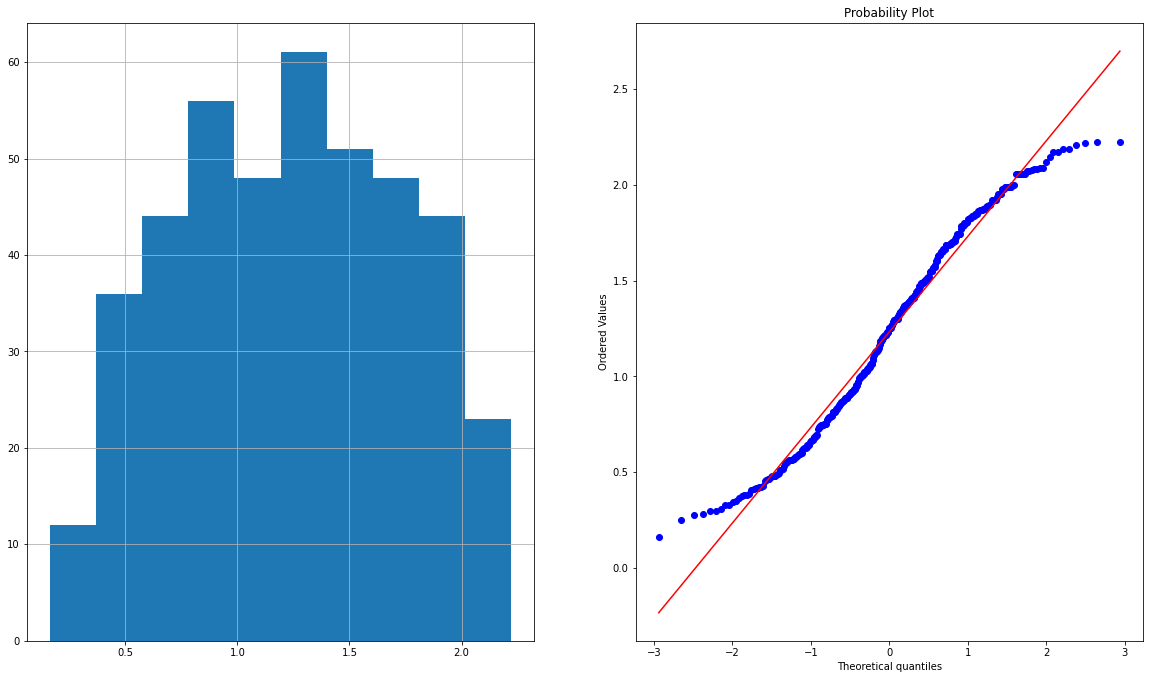

In [32]:
bos['DIS_log'] = np.log(bos['DIS'])
print(bos['DIS_log'].skew())
plot_data(bos, 'DIS_log')

0.3803961859443093


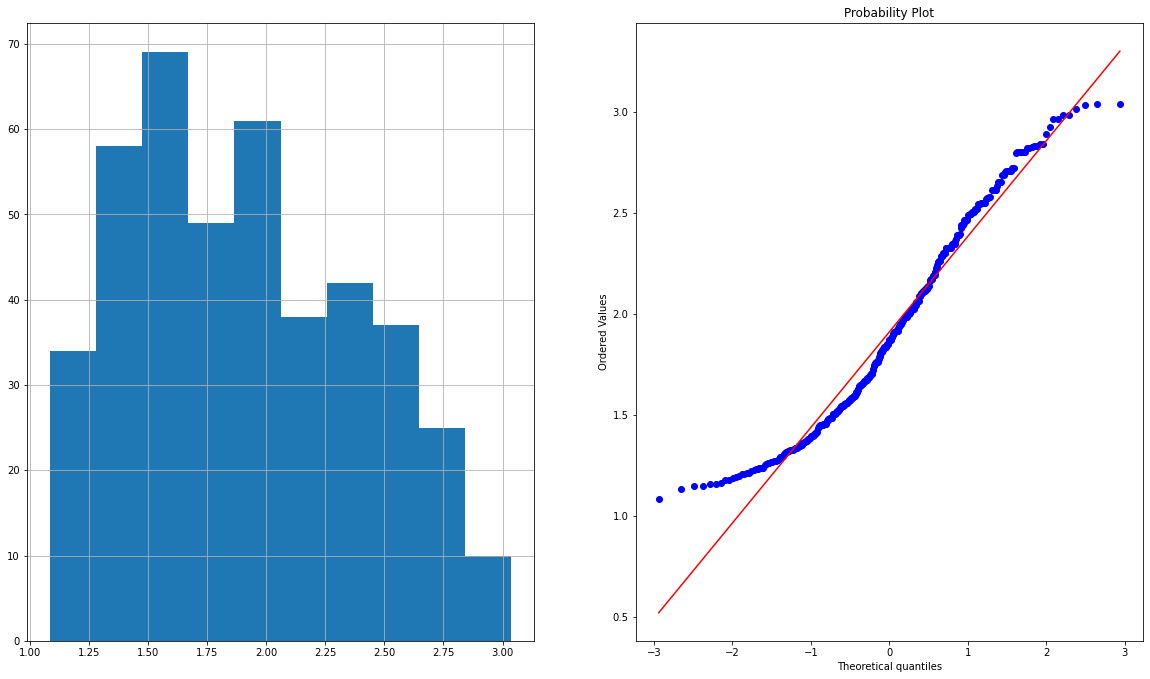

In [33]:
bos['DIS_sqrt'] = np.sqrt(bos['DIS'])
print(bos['DIS_sqrt'].skew())
plot_data(bos, 'DIS_sqrt')

0.008884274857597695


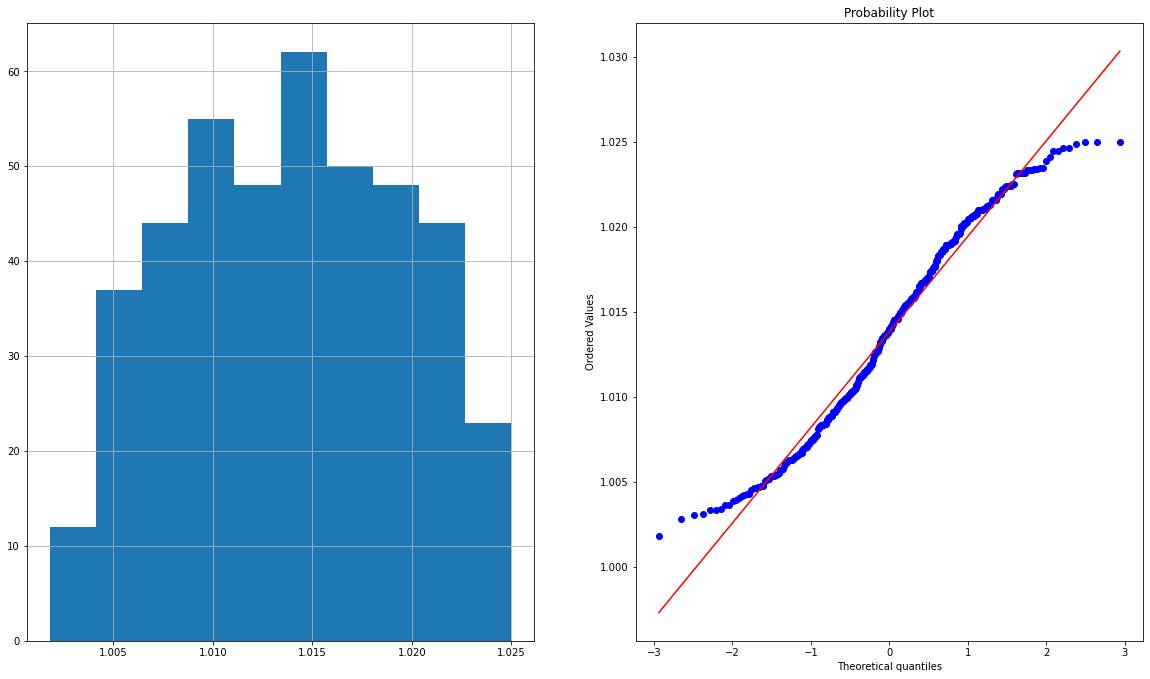

In [34]:
bos['DIS_exponential'] = (bos['DIS'])**(1/90)
print(bos['DIS_exponential'].skew())
plot_data(bos, 'DIS_exponential')

7.96201820579063e-05
-0.0004790137929380912


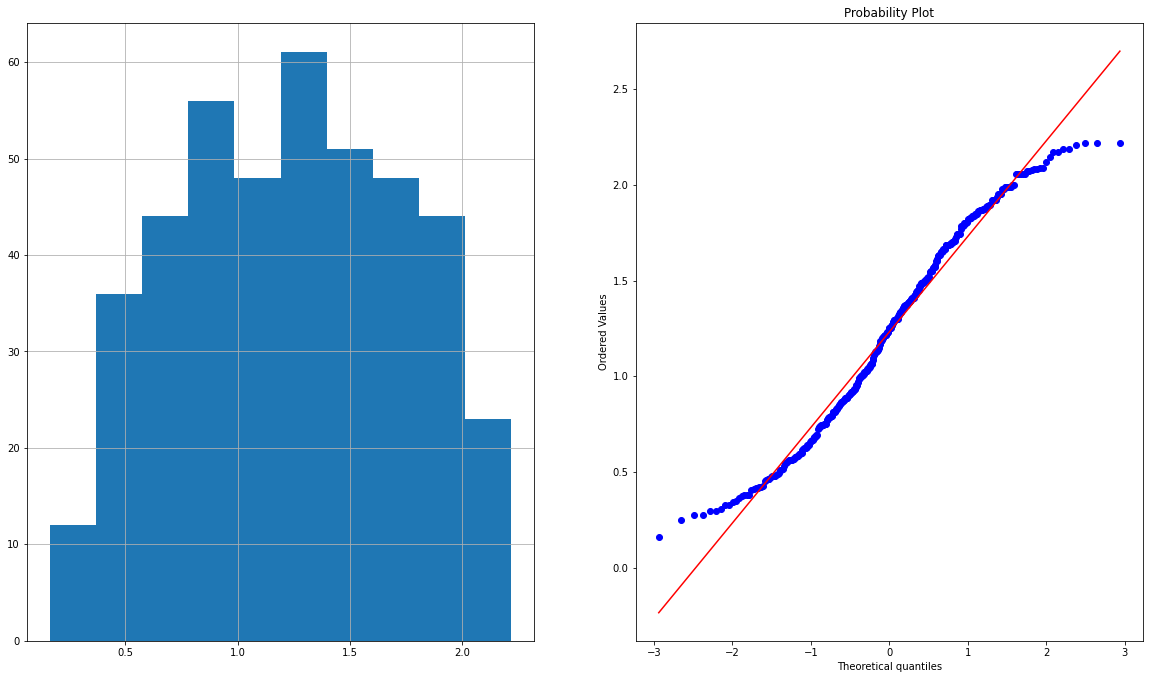

In [35]:
bos['DIS_boxcox'], parameter = stats.boxcox(bos['DIS'])
print(bos['DIS_boxcox'].skew())
print(parameter)
plot_data(bos, 'DIS_boxcox')

In [36]:
# bos.drop(['DIS_boxcox', 'DIS_reciprocal', 'DIS_exponential', 'DIS', 'DIS_sqrt'], axis=1, inplace=True)

1.2897248609741931


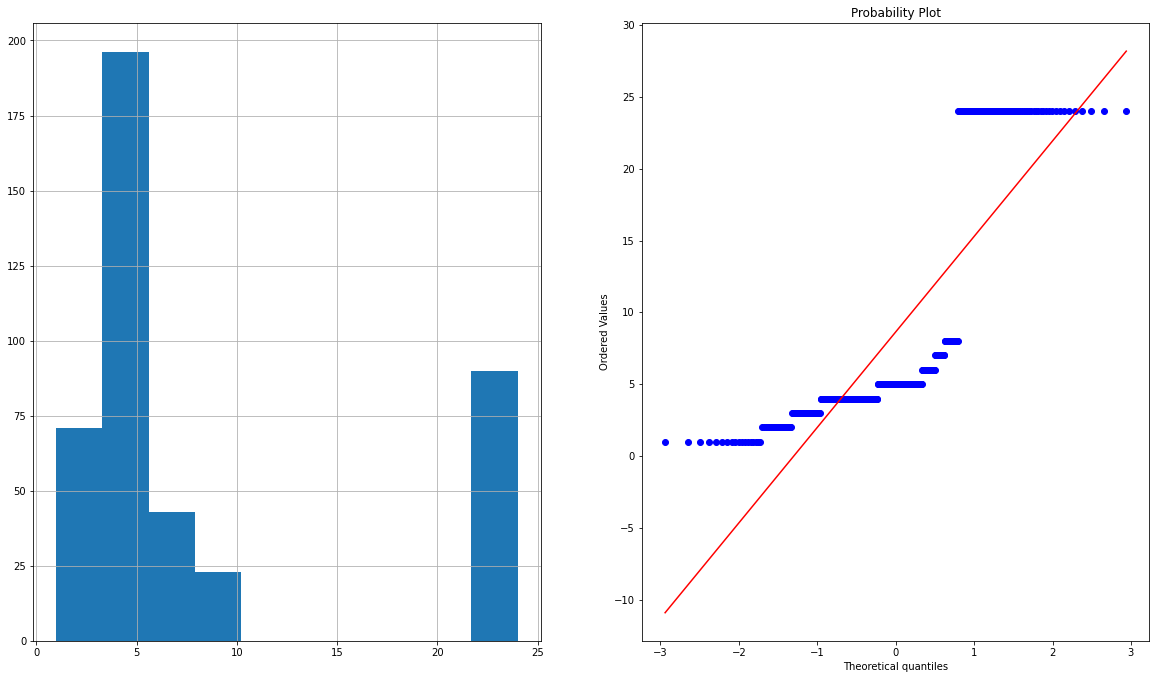

In [37]:
print(bos['RAD'].skew())
plot_data(bos, 'RAD')

-3.918880550894725


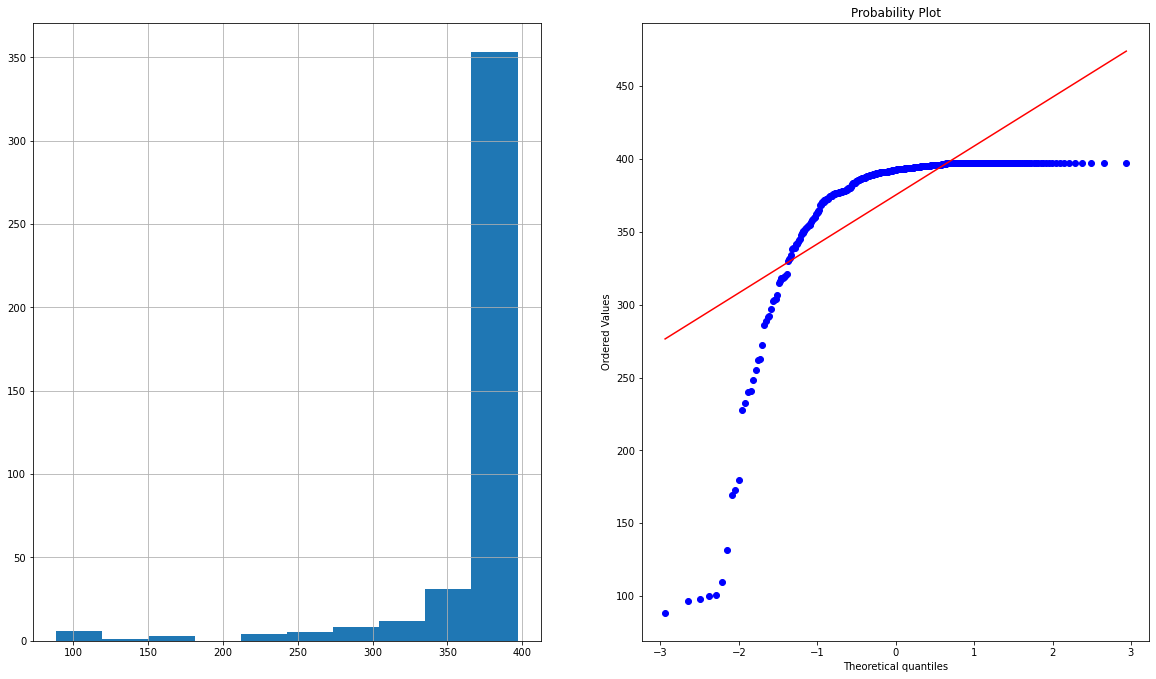

In [38]:
print(bos['B'].skew())
plot_data(bos, 'B')

0.1352491902066891


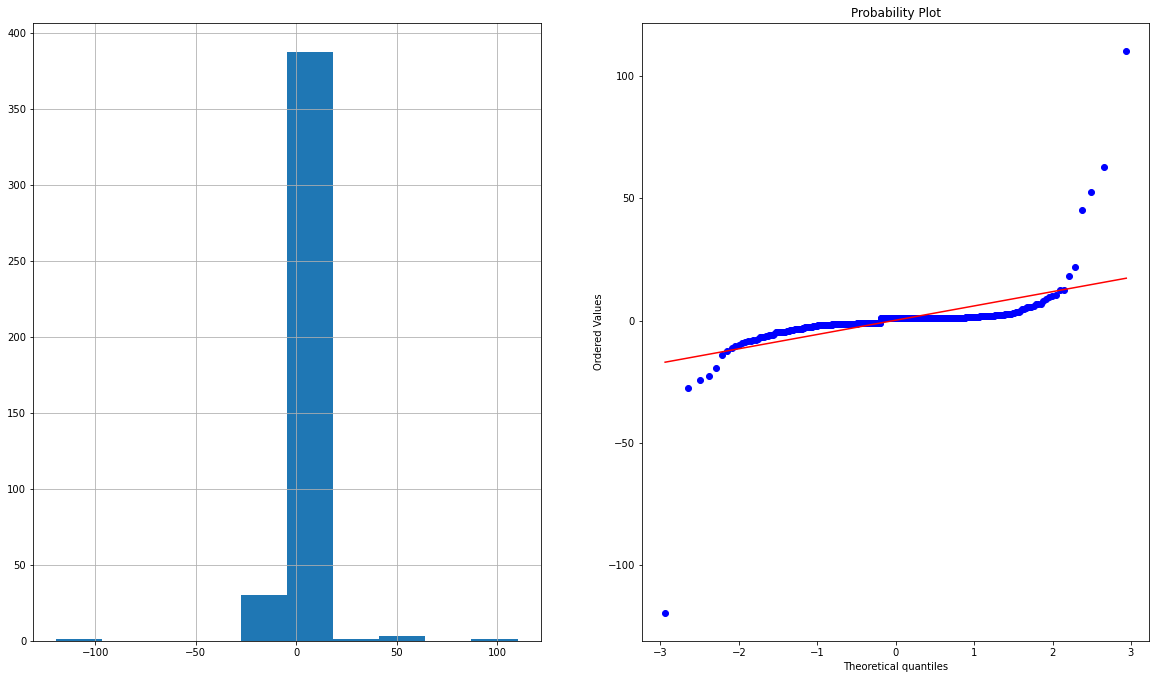

In [39]:
bos['B_sin'] = 1/np.sin(bos['B'])
print(bos['B_sin'].skew())
plot_data(bos, 'B_sin')

-1.2541524601577005
parameter =  10.790943015807235


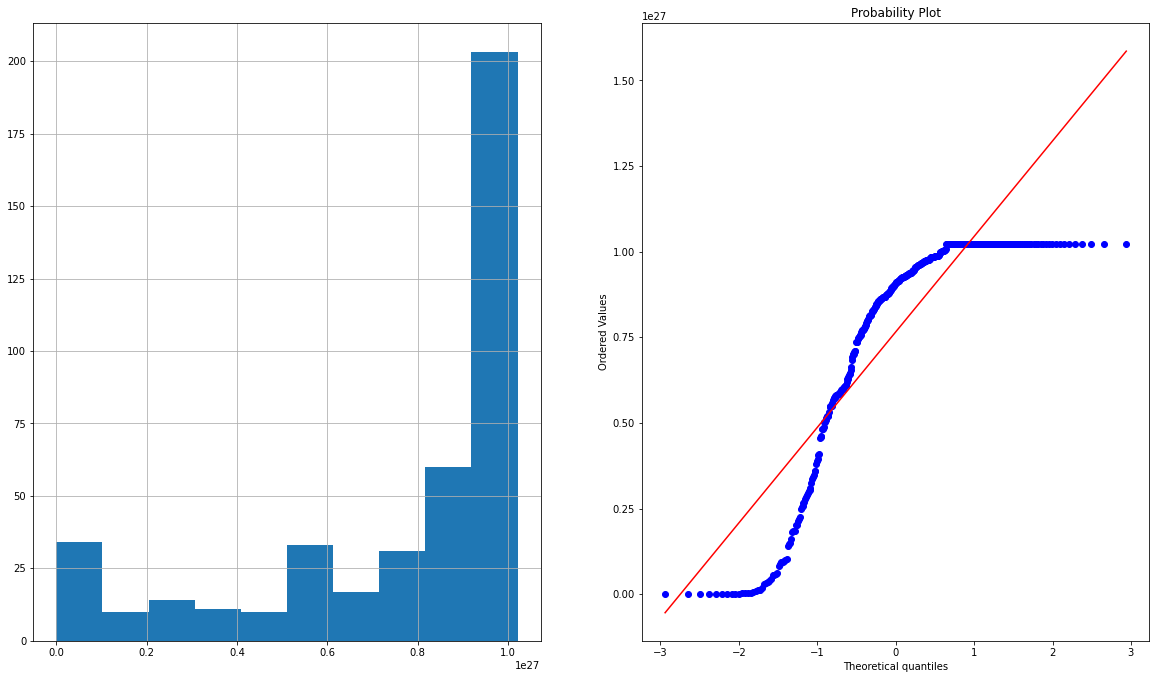

In [40]:
bos['B_boxcox'], parameter = stats.boxcox(bos['B'])
print(bos['B_boxcox'].skew())
print('parameter = ',parameter)
plot_data(bos, 'B_boxcox')

-5.1389807725763985


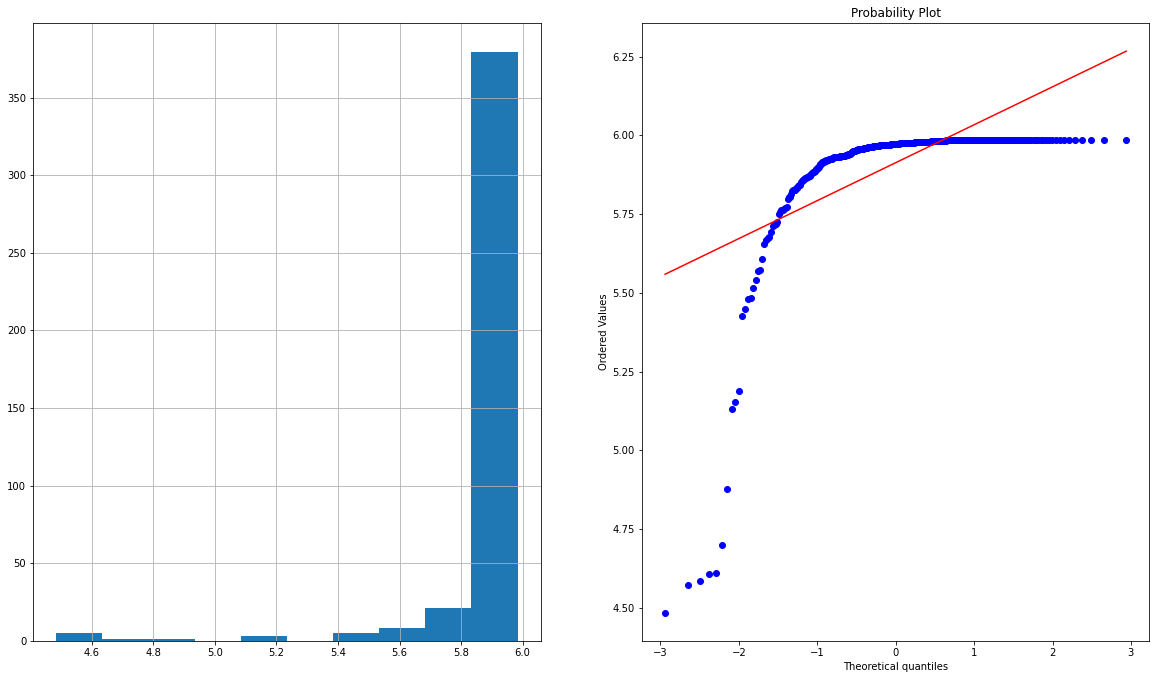

In [41]:
bos['B_log'] = np.log(bos['B'])
print(bos['B_log'].skew())
plot_data(bos, 'B_log')

6.482512081647007


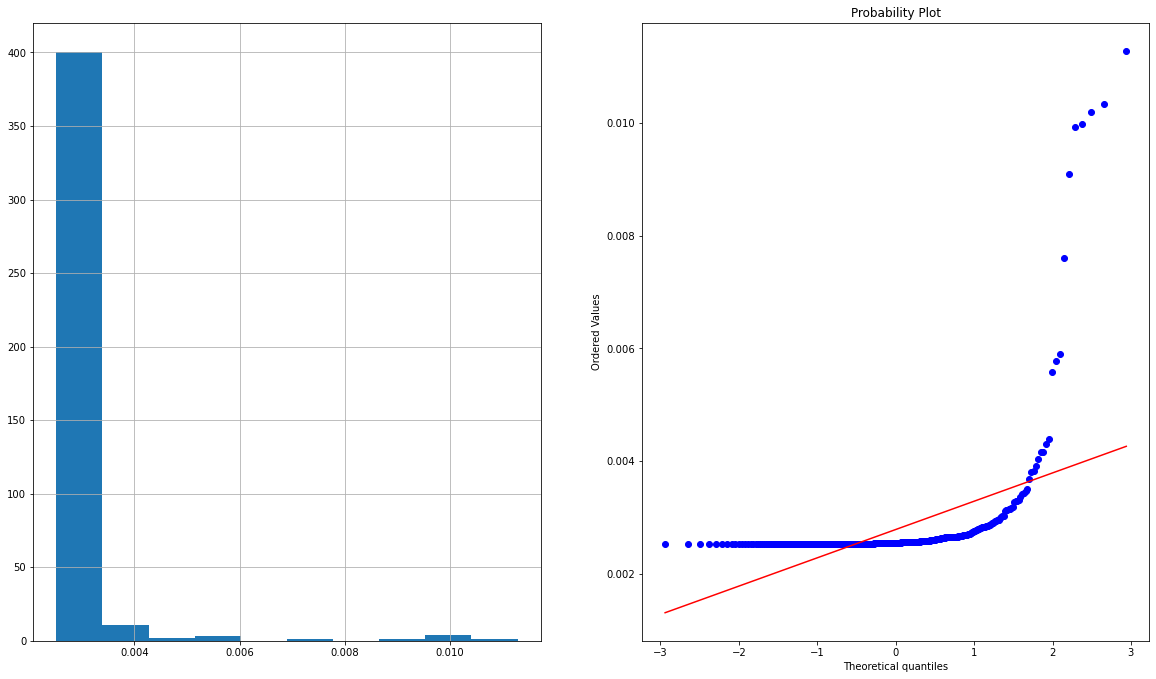

In [42]:
bos['B_reciprocal'] = 1/(bos['B'])
print(bos['B_reciprocal'].skew())
plot_data(bos, 'B_reciprocal')

In [43]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'price', 'CRIM_log', 'CRIM_sqrt',
       'CRIM_reciprocal', 'CRIM_exponent', 'CRIM_boxcox', 'ZN_log',
       'ZN_reciprocal', 'ZN_trigo', 'ZN_sqrt', 'ZN_exponential', 'ZN_boxcox',
       'DIS_log', 'DIS_sqrt', 'DIS_exponential', 'DIS_boxcox', 'B_sin',
       'B_boxcox', 'B_log', 'B_reciprocal'],
      dtype='object')

## Droping out extra columns

In [44]:
bos_transformed=bos.drop(['CRIM', 'ZN', 'DIS','B','CRIM_log', 'CRIM_sqrt',
       'CRIM_reciprocal', 'CRIM_exponent','ZN_log',
       'ZN_reciprocal','ZN_sqrt', 'ZN_exponential', 'ZN_boxcox','DIS_sqrt', 'DIS_exponential', 'DIS_boxcox',
          'B_boxcox', 'B_log', 'B_reciprocal'], axis=1)
bos_transformed

,INDUS,CHAS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,price,CRIM_boxcox,ZN_trigo,DIS_log,B_sin
0,2.31,0.0,0.538,6.575,65.2,1.0,296.0,15.3,4.98,24.0,-7.813072,-0.750987,1.408545,1.146755
1,7.07,0.0,0.469,6.421,78.9,2.0,242.0,17.8,9.14,21.6,-4.873442,0.000000,1.602836,1.146755
2,7.07,0.0,0.469,7.185,61.1,2.0,242.0,17.8,4.03,34.7,-4.874747,0.000000,1.602836,-7.660215
3,2.18,0.0,0.458,6.998,45.8,3.0,222.0,18.7,2.94,33.4,-4.574638,0.000000,1.802073,-1.068543
4,2.18,0.0,0.458,7.147,54.2,3.0,222.0,18.7,5.33,36.2,-3.337652,0.000000,1.802073,1.146755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,11.93,0.0,0.573,6.593,69.1,1.0,273.0,21.0,9.67,22.4,-3.488679,0.000000,0.907694,1.535775
502,11.93,0.0,0.573,6.120,76.7,1.0,273.0,21.0,9.08,20.6,-4.008399,0.000000,0.827460,1.146755
503,11.93,0.0,0.573,6.976,91.0,1.0,273.0,21.0,5.64,23.9,-3.536075,0.000000,0.773574,1.146755
504,11.93,0.0,0.573,6.794,89.3,1.0,273.0,21.0,6.48,22.0,-2.654009,0.000000,0.870833,-1.465609


In [45]:
bos_transformed.columns

Index(['INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'LSTAT',
       'price', 'CRIM_boxcox', 'ZN_trigo', 'DIS_log', 'B_sin'],
      dtype='object')

## Lets check the Statistical outcome of the data

In [46]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='price ~ INDUS + CHAS + NOX + RM + AGE + RAD + TAX + PTRATIO + LSTAT + CRIM_boxcox + DIS_log + B_sin + ZN_trigo', data=bos_transformed).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     93.95
Date:                Wed, 27 Jan 2021   Prob (F-statistic):          6.12e-114
Time:                        01:35:47   Log-Likelihood:                -1128.0
No. Observations:                 423   AIC:                             2284.
Df Residuals:                     409   BIC:                             2341.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      37.2736      4.467      8.344      0.000      28.492      46.055
INDUS          -0.0534      0.050     -1.074      0.284      -0.151       0.044
CHAS            1.0827      0.720      1.504      0.133      -0.332       2.497
NOX           -14.7998      3.384     -4.373      0.000     -21.452      -8.147
RM              3.9181      0.371     10.548      0.000       3.188       4.648
AGE            -0.0334      0.011     -3.152      0.002      -0.054      -0.013
RAD             0.1380      0.057      2.425      0.016       0.026       0.250
TAX            -0.0122      0.003     -4.218      0.000      -0.018      -0.007
PTRATIO        -0.7325      0.107     -6.864      0.000      -0.942      -0.523
LSTAT          -0.4452      0.046     -9.602      0.000      -0.536      -0.354
CRIM_boxcox     0.2813      0.168      1.678      0.094      -0.048       0.611
DIS_log        -4.7563      0.720     -6.604      0.000      -6.172      -3.340
B_sin           0.0049      0.018      0.278      0.781      -0.030       0.040
ZN_trigo        1.0332      0.531      1.945      0.052      -0.011       2.078
==============================================================================
Omnibus:                       49.868   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           0.678   Prob(JB):                     1.12e-21
Kurtosis:                       4.907   Cond. No.                     1.28e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The OLS model is giving a R_square value 0.75 and Adjusted_R2_square value 0.74 

In [47]:
#splitting data into features and target
X = bos_transformed.drop(['price'], axis=1)
y = bos_transformed['price']

In [48]:
#scaling the data
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

### Checking for Multicollinearity in the data

In [49]:
#checking for multicollinearity in the data
variables = X_scaled

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['feature'] = X.columns

In [50]:
vif

,VIF,feature
0,3.723472,INDUS
1,1.079526,CHAS
2,5.013784,NOX
3,1.751435,RM
4,2.974259,AGE
5,7.206195,RAD
6,7.215678,TAX
7,1.416034,PTRATIO
8,2.819406,LSTAT
9,4.642154,CRIM_boxcox


#### Some of the features have multicollinearity as value is heigher than 5 lets add those features and see 

In [51]:
#adding high collinearity columns and dropping them
bos_transformed['rad_tax_nox'] = bos_transformed['RAD'] + bos_transformed['TAX'] + bos_transformed['NOX']
bos_transformed.drop(['RAD', 'TAX', 'NOX'], axis=1, inplace=True)

In [52]:
#checking multicollinearity of the data
X = bos_transformed.drop(['price'], axis=1)
y = bos_transformed['price']

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

variables = X_scaled

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif['feature'] = X.columns
vif

,VIF,feature
0,3.295002,INDUS
1,1.063825,CHAS
2,1.701902,RM
3,2.861956,AGE
4,1.272082,PTRATIO
5,2.819125,LSTAT
6,3.377921,CRIM_boxcox
7,1.066267,ZN_trigo
8,3.645828,DIS_log
9,1.037160,B_sin


#### Now the values are less than 5 which means there is no multicollinearity and we can proceed with this

## Model Building

In [53]:
#splitting data into train and split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [54]:
#function to calculate adjusted r-square
def adj_r2(x, y, model):
    r2 = model.score(x, y)
    n = x.shape[0]
    p = x.shape[1]
    adj_r2_score = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2_score

In [55]:
#Making an instance of LinearRegession and fitting the model to training data
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [56]:
#saving the model
pickle.dump(lr, open('final_model_v1.pkl', 'wb'))

In [57]:
#train score
lr.score(X_train, y_train)

0.717822687966789

In [58]:
#test score
lr.score(X_test, y_test)

0.7465418400948037

In [59]:
#adjusted R-squre score
adj_r2(X_test, y_test, lr)

0.7222980161038719

In [60]:
#creatinf instance of LassoCV and finding out the value of alpha
lassocv = LassoCV(alphas=None, cv=10, normalize=True, max_iter=10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000, normalize=True)

In [61]:
#Making instance of Lasso with the already founded alpha value and fitting the model to training data
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0006280699615692755)

In [62]:
#saving the model
pickle.dump(lr, open('final_model_v2.pkl', 'wb'))

In [63]:
#checking the scores
print('train score = ', lasso.score(X_train, y_train))
print('test score = ', lasso.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, lasso))

train score =  0.7178224230984982
test score =  0.7465353677279851
adjusted R2 score =  0.7222909246410967


In [64]:
#creating an instance of RidgeCv and finding out the value of alpha
alphas = np.linspace(0, 1, num=50)
ridgecv = RidgeCV(alphas=alphas, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.        , 0.02040816, 0.04081633, 0.06122449, 0.08163265,
       0.10204082, 0.12244898, 0.14285714, 0.16326531, 0.18367347,
       0.20408163, 0.2244898 , 0.24489796, 0.26530612, 0.28571429,
       0.30612245, 0.32653061, 0.34693878, 0.36734694, 0.3877551 ,
       0.40816327, 0.42857143, 0.44897959, 0.46938776, 0.48979592,
       0.51020408, 0.53061224, 0.55102041, 0.57142857, 0.59183673,
       0.6122449 , 0.63265306, 0.65306122, 0.67346939, 0.69387755,
       0.71428571, 0.73469388, 0.75510204, 0.7755102 , 0.79591837,
       0.81632653, 0.83673469, 0.85714286, 0.87755102, 0.89795918,
       0.91836735, 0.93877551, 0.95918367, 0.97959184, 1.        ]),
        cv=10, normalize=True)

In [65]:
#creating instance of Ridge with apha value from above and fitting the model to training data
ridge=Ridge(alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.08163265306122448)

In [66]:
#saving the model
pickle.dump(ridge, open('final_model_v3.pkl', 'wb'))

In [67]:
#checking the scores
print('train score = ', ridge.score(X_train, y_train))
print('test score = ', ridge.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, ridge))

train score =  0.7178226004256059
test score =  0.7465571976902343
adjusted R2 score =  0.7223148426866914


In [68]:
#creating an instance of ElasticNetCV and finding out the value of alpha and l1_ratio
elasticcv = ElasticNetCV(alphas=None, max_iter=10000, normalize=True, cv=10)
elasticcv.fit(X_train, y_train)

ElasticNetCV(cv=10, max_iter=10000, normalize=True)

In [69]:
#creating instance of ElasticNet with apha value from above and fitting the model to training data
elastic = ElasticNet(alpha=elasticcv.alpha_, l1_ratio=elasticcv.l1_ratio_)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.000583048504069511)

In [70]:
#saving the model
pickle.dump(ridge, open('final_model_v4.pkl', 'wb'))

In [71]:
#checking the scores
print('train score = ', elastic.score(X_train, y_train))
print('test score = ', elastic.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, elastic))

train score =  0.7178224020864159
test score =  0.746554390056954
adjusted R2 score =  0.7223117664971844


In [77]:
#creating instance of RandomForest and fitting the model
rgsr = RandomForestRegressor()
rgsr.fit(X_train, y_train)

RandomForestRegressor()

In [78]:
#saving the model
pickle.dump(rgsr, open('final_model_v5.pkl', 'wb'))

In [79]:
#checking the scores
print('train score = ', rgsr.score(X_train, y_train))
print('test score = ', rgsr.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, rgsr))

train score =  0.9718162697941392
test score =  0.8734187837408462
adjusted R2 score =  0.8613110152291011


we can see that our RandomForest model has high accuracy compared to other models but our model is clearly overfitting

### Hyperparameter Tuning

In [80]:
#setting the parameters
grid_params = {
    'criterion': ['mse', 'mae'],
    'min_samples_split': np.arange(2,10),
    'min_samples_leaf': np.arange(1,10),
    'max_features': ["auto", "sqrt", "log2"]
}

In [81]:
#using gridsearchcv to get the parameters for a stable model
grid_search = GridSearchCV(estimator=rgsr, param_grid=grid_params, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:  9.6min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=3)

In [82]:
#checking the best score and prameter
print('best score = ',grid_search.best_score_)
print('best parameters = ', grid_search.best_params_)

best score =  0.808633385899309
best parameters =  {'criterion': 'mae', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [84]:
#training data with stable model
rgsr = RandomForestRegressor(**grid_search.best_params_)
rgsr.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_features='log2', min_samples_split=4)

In [85]:
#saving the model
pickle.dump(rgsr, open('final_model_v6.pkl', 'wb'))

In [86]:
#checking the scores
print('train score = ', rgsr.score(X_train, y_train))
print('test score = ', rgsr.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, rgsr))

train score =  0.9577530953875918
test score =  0.8502518615474668
adjusted R2 score =  0.8359281265650506


In [108]:
#using randomizedsearchcv to get the parameters for a stable model
random_search = RandomizedSearchCV(estimator=rgsr, param_distributions=grid_params, cv=5, n_jobs=-1, verbose=3, n_iter=100)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features='log2',
                                                   min_samples_split=4),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   verbose=3)

In [109]:
#checking the best score and prameter
print('best score = ',random_search.best_score_)
print('best parameters = ', random_search.best_params_)

best score =  0.8017479052334476
best parameters =  {'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'criterion': 'mse'}


In [110]:
#training data with stable model
rgsr = RandomForestRegressor(**random_search.best_params_)
rgsr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_split=3)

In [111]:
#saving the model
pickle.dump(rgsr, open('final_model_v7.pkl', 'wb'))

In [112]:
#checking the scores
print('train score = ', rgsr.score(X_train, y_train))
print('test score = ', rgsr.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, rgsr))

train score =  0.9672882378120963
test score =  0.8595090041445612
adjusted R2 score =  0.8460707349757801


Text(0.5, 1.0, 'Explained Variance')

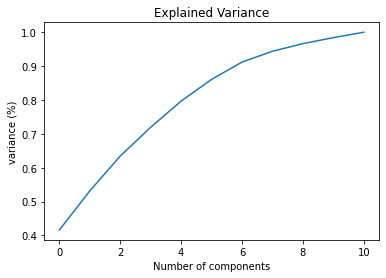

In [113]:
#Reducing dimension with PCA
from sklearn.decomposition import PCA
pca = PCA()
principalcomponents = pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("variance (%)")
plt.title('Explained Variance')

In [131]:
#compressing the dataset columns
pca = PCA(n_components=7)
new_data = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(new_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
principal_x.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-2.919497,-1.014272,1.137845,-0.455404,1.737701,1.700363,-0.760427
1,-1.688677,-0.169797,0.277418,-0.190234,-0.026498,0.332846,-1.073271
2,-2.520377,0.282797,0.076975,1.101753,0.669081,0.133334,-0.773237
3,-3.059722,-0.274909,-0.457770,0.556326,0.424252,-0.311799,-0.557967
4,-2.636262,-0.177210,-0.671696,0.513769,0.493007,-0.181197,-0.694667


In [132]:
#splitting data into train and split
X_train, X_test, y_train, y_test = train_test_split(principal_x, y, test_size=0.3, random_state=42)

In [133]:
#training data with RandomForestRegressor
rgsr = RandomForestRegressor()
rgsr.fit(X_train, y_train)

RandomForestRegressor()

In [134]:
#saving the model
pickle.dump(rgsr, open('final_model_v8.pkl', 'wb'))

In [135]:
#checking the scores
print('train score = ', rgsr.score(X_train, y_train))
print('test score = ', rgsr.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, rgsr))

train score =  0.958462951686778
test score =  0.8282420648469766
adjusted R2 score =  0.8181386568967988


In [136]:
#using gridsearchcv to get the parameters for a stable model
grid_search = GridSearchCV(estimator=rgsr, param_grid=grid_params, cv=5, n_jobs=-1, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 10.4min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             verbose=3)

In [137]:
#checking the best score and prameter
print('best score = ',grid_search.best_score_)
print('best parameters = ', grid_search.best_params_)

best score =  0.7023565975492183
best parameters =  {'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 4}


In [138]:
#training data with stable model
rgsr = RandomForestRegressor(**grid_search.best_params_)
rgsr.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', min_samples_split=4)

In [139]:
#saving the model
pickle.dump(rgsr, open('final_model_v9.pkl', 'wb'))

In [140]:
#checking the scores
print('train score = ', rgsr.score(X_train, y_train))
print('test score = ', rgsr.score(X_test, y_test))
print('adjusted R2 score = ', adj_r2(X_test, y_test, rgsr))

train score =  0.947594967794844
test score =  0.825785900884646
adjusted R2 score =  0.8155380127013898


In [141]:
pickle.dump(pca, open('principal_component.pkl','wb'))
pickle.dump(sc, open('scale.pkl', 'wb'))